# The Cosmic Side of Twitter

## 1. Motivation
### 1.1 Introduction to the dataset
The year of 2020 pushed all the people to switch working from a physical environment to the online one. Although, even from before the pandemic, people were very active in the social media area which raises the assumption that social media played and still plays a major role in everybody’s life. Another thing that is very popular among people, especially among women is believing in astrology. Reading the horoscope every day, sharing posts about how their zodiac sign behaves in certain situations, trying to create a relationship based on the compatibility between the signs are just few of the things that can be seen at least once while scrolling on different platforms. Thus, the motivation for this project was to see if there is any correlation between a personality (singers, politicians, actors, etc.) and their zodiac sign. 


In order to gather all the information needed, the Twitter API was used to collect the most followed accounts together with heir handle, number of following accounts, and their last 50 Tweets from the past week (16/11/2020 - 20/11/2020). However, since most of the accounts do not have the birthdate visible, the Wikipedia API was used to extract this information and attach it to the data extracted before. In the end, the final dataset consists in 2151 entries(rows) and 9 columns. Each row represents one personality and the columns in this dataset holds information regarding their name, WikiLink, handle, birthday, Zodiac Sign determined from their birthday), Element (determined from their zodiac sign), tweets, following and their Twitter account id. 
 
### 1.2 Reason for choosing this dataset
The first step that was taken in order to determine which dataset to use was to have a group discussion. Here all the members stated what are their interests and what are their expectations from this project. Based on this discussion, few criteria were narrowed down. The main one was that the dataset should have a large number of entries so it will give the possibility to challenge the members. The next step was to start gathering all the information desired. Since the zodiac sign and the element affiliated were not available anywhere, the part where it is defined was programmed separately. The reason for why it was decided to go in this direction was because it was wanted to see how different personalities interact with each other, if they tend to follow people that have the same interests zodiac sign, what is the common language use by zodiac sign, 

### 1.3 The goal for the end user's experience
The goal for the end user’s experience is to provide a scientific inside on a topic that is part of popular culture. 
It is desired that the findings bring some light into such an abstract matter as the zodiac signs are.  
Let this notebook be the nexus for those interested in astrology as well as those who are curious about how astrology can be studied with network analysis. 


## 2. Basic stats
### 2.1 Packages used
In order to be able to achieve the final goal, the following packages were  used:

In [307]:
!pip install python-louvain
from bs4 import BeautifulSoup
from collections import Counter
import community as community_louvain
import datetime
from fa2 import ForceAtlas2
import json
from math import isnan
import matplotlib.pyplot as plt
import networkx as nx
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords as sw
from nltk.corpus import words
from nltk.probability import FreqDist
#from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WhitespaceTokenizer
import numpy as np
import pandas as pd
import pickle
from PIL import Image
import re
import seaborn as sns
import wordcloud
from wordcloud import ImageColorGenerator, WordCloud

# Define default plot style
plt.style.use('default')
    
# Define dark plot style (only activated for the website)
# plt.style.use('dark_background') 

You should consider upgrading via the 'c:\users\lulka\anaconda3\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lulka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lulka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\lulka\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


The zodiac signs, elements and their assigned colors are defined as they are used throughout the notebook

In [308]:
ZODIAC_SIGNS = ['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo', 'Libra', 'Pisces', 'Sagittarius', 'Scorpio', 'Taurus', 'Virgo']

ZODIAC_ELEMENTS = ['Water', 'Fire', 'Earth', 'Air']

color_legend_zodiac = {
    'Aries': '#FFFF66', 'Taurus': 'gold', 'Gemini': 'orange', 'Cancer': 'orangered', 'Leo': 'crimson', 'Virgo': 'mediumvioletred', 'Libra': 'darkviolet', 'Scorpio': 'mediumblue', 'Sagittarius': 'royalblue', 'Capricorn': 'c', 'Aquarius': 'green', 'Pisces': 'limegreen'}

color_legend_element = {'Air': 'yellow', 'Fire': 'orange', 'Water': 'blue', 'Earth': 'green'}

### 2.2 Dataset compilation
After all the data is gathered (see ./DataGathering.ipynb), the dataset is loaded, deleting duplicates rows and rows that contain NaN values.
### 2.3 Dataset cleaning 


In [309]:
# Load the dataframe with all of our data
df = pd.read_pickle('./datafiles/full_df.pickle')

# Remove NaN and duplicates
df.drop_duplicates(subset ="Handle", inplace = True)
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)

df.head()

Name           WikiLink         Handle    Birthday ZodiacSign  \
0       Barack Obama       Barack Obama   @barackobama  1961-08-04        Leo   
1      Justin Bieber      Justin Bieber  @justinbieber  1994-03-01     Pisces   
2         KATY PERRY         Katy Perry     @katyperry  1984-10-25    Scorpio   
3            Rihanna            Rihanna       @rihanna  1988-02-20     Pisces   
4  Cristiano Ronaldo  Cristiano Ronaldo     @cristiano  1985-02-05   Aquarius   

  Element                                             Tweets  \
0    Fire  ['More than anyone else, I wrote my book for y...   
1   Water  ['Happy 5 years of Purpose', 'Rockin Around th...   
2   Water  ['❗️KATYCATS N KATYCLOWNTS❗️I’ve been cookin’ ...   
3   Water  ['The faces of history makers, boundary breake...   
4     Air  ['@DjokerNole not bad bro🤔😅', 'P𝐫𝐞𝐩𝐚𝐫𝐚𝐝𝐨𝐬! 🇵🇹💪...   

                                           Following         Id  
0  [1330457336, 3383203552, 30354991, 3157910605,...     813286  
1  [1096286154930843648, 30973513, 3320745074, 23...   27260086  
2  [939091, 180535644, 4185877812, 3564127636, 62...   21447363  
3  [1116089461480153088, 480769467, 401802609, 11...   79293791  
4  [1324677118660280320, 4793420675, 108557129919...  155659213

Our dataframe consists of 2151 rows and the following columns:
- Name: 
- Wikilink: Link to the users Wikipedia page
- Handle: Twitter username
- Birthday: Date of birth (based on the Wikipedia page)
- ZodiacSign: Zodiac sign (based on the birthday)
- Element: (based on the zodiac sign)
- Tweets: last 50 tweets before the 20th of November 2020
- Following: id of the twitter accounts that the user follows
- Id: id of the twitter account

### 2.4 Creation of the network
A directed graph is generated from the dataset. The result is a network with the twitter usernames of our celebrities as nodes, and the links are a representation of which user follows the other. Attributes are added from the dataframe to the nodes as they are needed later.

In [310]:
# Create the nodes of the graph
G = nx.DiGraph()
G.add_nodes_from(df.Handle)

# Set the attributes of the nodes
nx.set_node_attributes(G, dict(zip(df.Handle, df.ZodiacSign)), "zodiac")
nx.set_node_attributes(G, dict(zip(df.Handle, df.Element)), "element")
nx.set_node_attributes(G, dict(zip(df.Handle, df.Id)), "id")

# Create the links of the graph
user_names_by_id = {value : key for (key, value) in nx.get_node_attributes(G, 'id').items()}

for user in user_names_by_id.values():
    for following in df.loc[df['Handle'] == user]["Following"]:
        for friend in following:
            try:
                friend_name = user_names_by_id[friend]
                G.add_edge(user, friend_name)
            except:
                pass
            
print("The number of nodes in the network is: ", G.number_of_nodes())
print("The number of links in the network is: ", G.number_of_edges())

The number of nodes in the network is:  2151
The number of links in the network is:  124721


Isolated nodes are removed, so only connected nodes are included, as the isolated nodes are not going to be useful for the network.

In [311]:
# Remove isolates
isolated = list(nx.isolates(G))
G.remove_nodes_from(isolated)

# Select giant connected component
largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

# Create undirected graph
U = G.to_undirected()

print("The new number of nodes in the network is: ", G.number_of_nodes())

The new number of nodes in the network is:  2037


After removing the isolated nodes, it is evident that the network had 114 isolated nodes.

### 2.5 Visualization of the network
First the size and color of the nodes are determined, and then a position is calculated using the Force Atlas package.

In [312]:
# Display the network using forceAtlas

# Color the nodes based on the zodiac sign
node_color_zodiac = []
for node in U.nodes(data=True):
    node_color_zodiac.append(color_legend_zodiac[node[1]['zodiac']])

    
# Color the nodes based on the element 
node_color_element = []
for node in U.nodes(data=True):
    node_color_element.append(color_legend_element[node[1]['element']])


# Size the nodes based on their degree
node_size = [v*0.5 for v in dict(U.degree).values()]

# Configure forceAtlas
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=False)

# Obtain the positions
positions = forceatlas2.forceatlas2_networkx_layout(U, pos=None, iterations=200)

Nodes are colored based on the zodiac sign of the user. This could also be the element of the user. Below, the network is plotted:

C:\Users\lulka\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


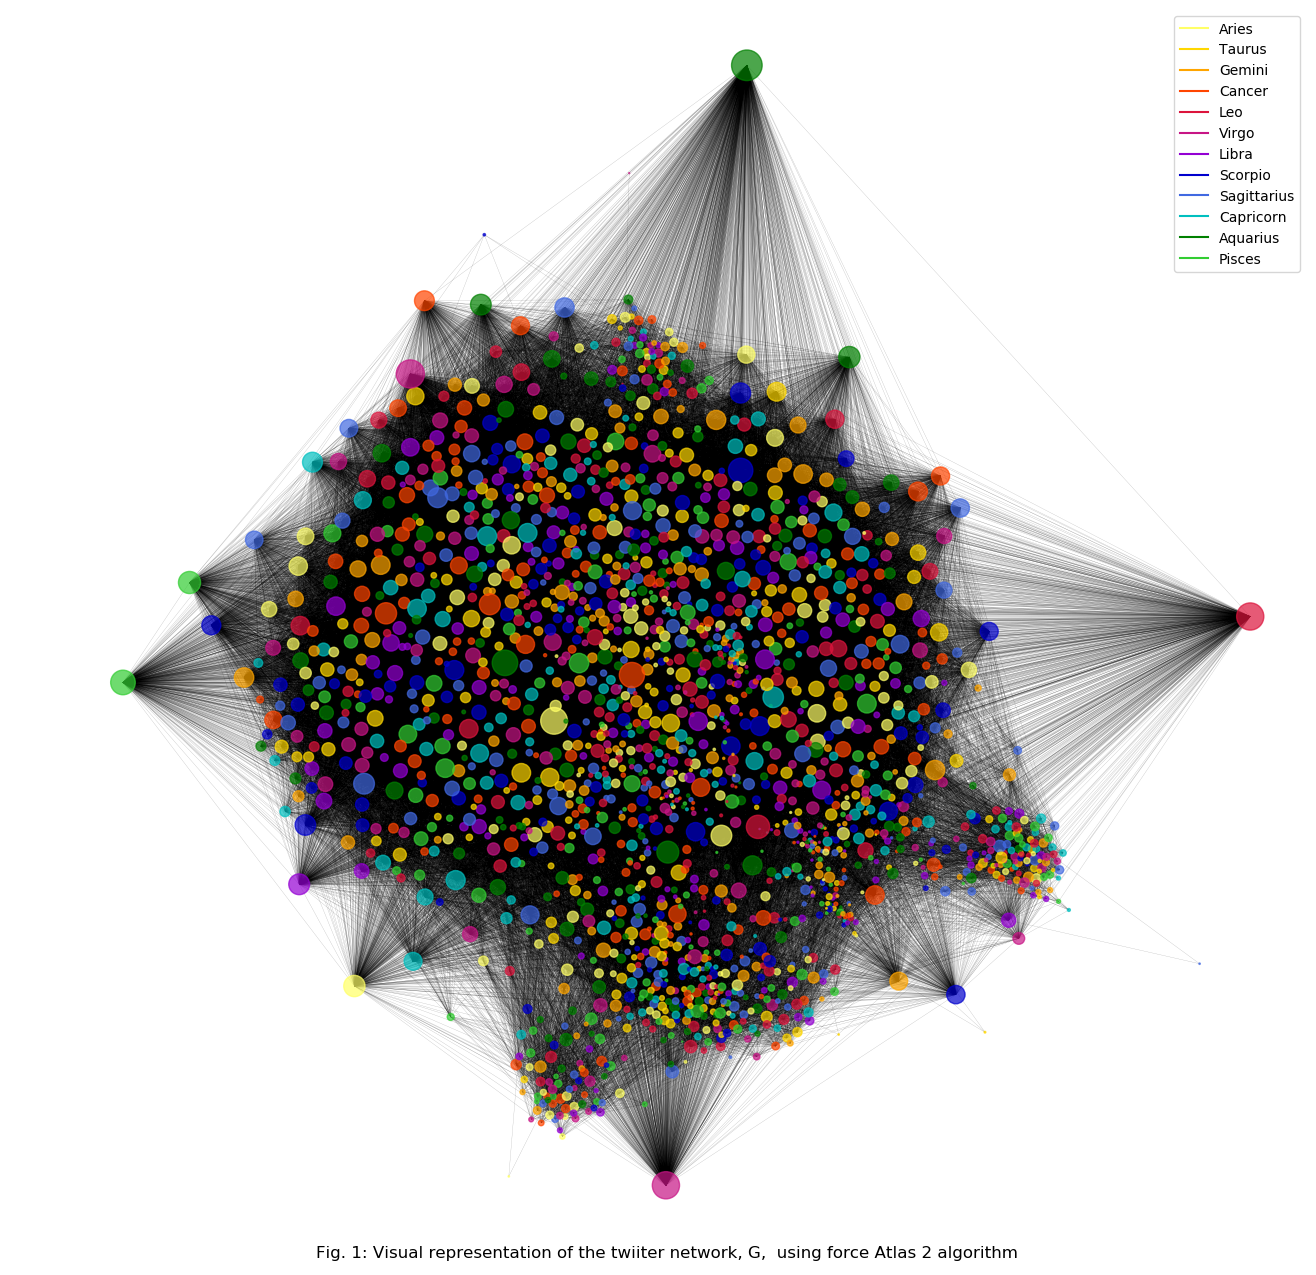

In [313]:
plt.figure(figsize = (16,16))

# PLot the undirected graph
nx.draw_networkx_nodes(U, pos=positions, alpha=0.7, node_size=node_size, node_color=node_color_zodiac)
nx.draw_networkx_edges(U, pos=positions, alpha=0.3,width=0.2)


# Caption figure
plt.figtext(
    0.5, 
    0.1, 
    'Fig. 1: Visual representation of the twiiter network, G,  using force Atlas 2 algorithm', 
    wrap=True, 
    horizontalalignment='center', 
    fontsize=12
)

# Create legend
for label in color_legend_zodiac:
    plt.plot([0],[0],color=color_legend_zodiac[label],label=label)
    
plt.legend()
plt.axis('off')
plt.show()

### 2.6 Degree
Before going deeper into the analysis of the network, the distribution of the zodiac signs areplotted:

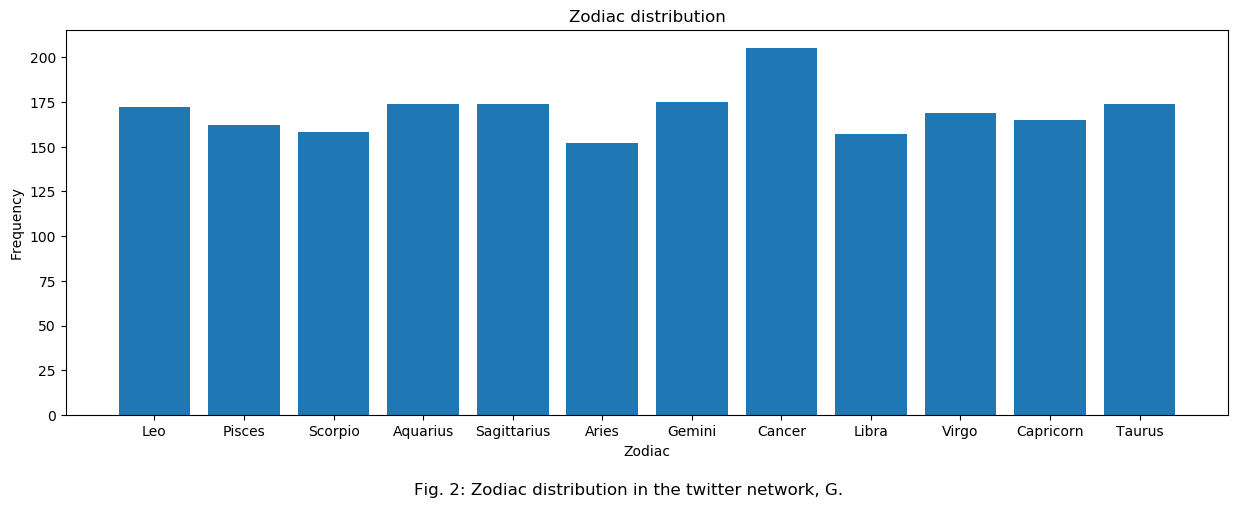

In [314]:
# Plot zodiac distribution

zodiacs = [value for key, value in nx.get_node_attributes(G, 'zodiac').items()]
counts_zodiac = Counter(zodiacs)

# Create histrogram with a bin for each zodiac sign
plt.figure(figsize = (15,5))
plt.bar(range(len(counts_zodiac)), list(counts_zodiac.values()), align='center')
plt.xticks(range(len(counts_zodiac)), list(counts_zodiac.keys()))

# Format plot
plt.title("Zodiac distribution")
plt.ylabel("Frequency")
plt.xlabel("Zodiac")
plt.figtext(
    0.5, 
    -0.05, 
    'Fig. 2: Zodiac distribution in the twitter network, G.', 
    wrap=True, 
    horizontalalignment='center', 
    fontsize=12
)

plt.show()

As shown above, the distribution of the zodiac signs is quite even, which mimics the general population and is an indication of a balanced dataset.

The in- and out-degree is plotted. As the network is a social network, it is expected that the network is scale free and the degree distribution follows a power law.


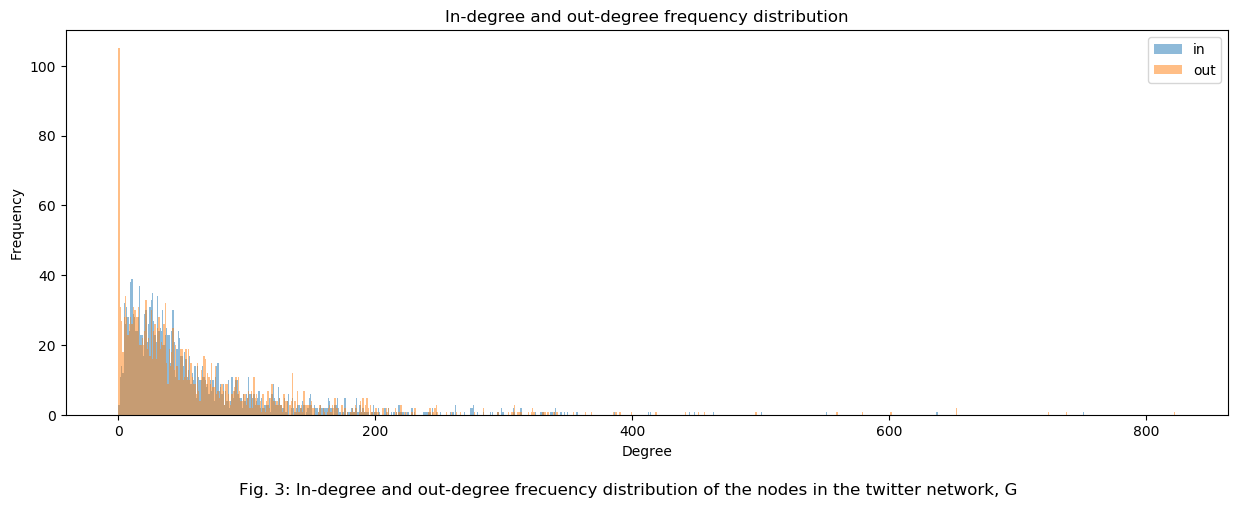

In [315]:
# Plot the in and out degree distribution

plt.figure(figsize = (15,5))

in_degree = [value for key, value in list(G.in_degree())]
plt.hist(in_degree, bins=range(np.min(in_degree), np.max(in_degree)+1), alpha=0.5, label="in")

out_degree = [value for key, value in list(G.out_degree())]
plt.hist(out_degree, bins=range(np.min(out_degree), np.max(out_degree)+1), alpha=0.5, label="out")

plt.title("In-degree and out-degree frequency distribution")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.legend()
plt.figtext(
    0.5, 
    -0.05, 
    'Fig. 3: In-degree and out-degree frecuency distribution of the nodes in the twitter network, G',
    wrap=True, 
    horizontalalignment='center', 
    fontsize=12
)
plt.show()

The in-degree distribution can be interpreted as the popularity of the user among the other users of the network, while out-degree might tell us something about the personality of the user as we usually tend to follow accounts we find interesting.

It is apparent that out of all of the nodes in the network, more than one hundred of them have an out-degree of 0. This can be seen in users like Taylor Swift (@taylorswift). This is quite a common thing to among popular pages, so it was expected to appear in the network. There are also several pages with a very high out degree, indicating the users that follow a large portion of the other users in the network.

While the out-degree distribution has more high and low values than the out-degree distribution, the in-degree distribution has a higher frequency of low-medium degrees. This is because a few very majorly popular profiles exist, and many are only relatively popular within the network of profiles.

The degree distribution follows a power law, and therfore the network is a scale-free network. The degree distribution of an equivalent random network can be visualized for comparison.

A random network is created as an Erdős-Rényi graph with the same number of nodes as G, and a p-value determined from the network size and average degree.

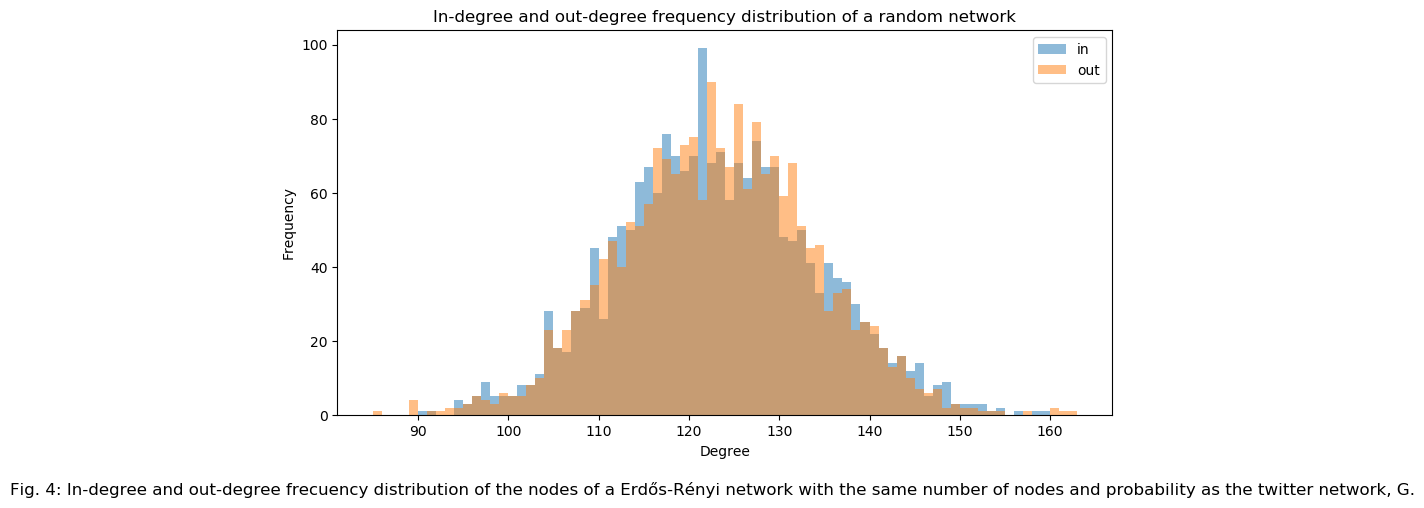

In [316]:
# Check if our network resembles a random network 

k = np.mean([value for key, value in list(G.degree())])
N = G.number_of_nodes()
p = k/(N-1)

ER = nx.erdos_renyi_graph(N, p, directed = True)

plt.figure(figsize = (10,5))

in_degree = [value for key, value in list(ER.in_degree())]
plt.hist(in_degree, bins=range(np.min(in_degree), np.max(in_degree)+1), alpha=0.5, label="in")

out_degree = [value for key, value in list(ER.out_degree())]
plt.hist(out_degree, bins=range(np.min(out_degree), np.max(out_degree)+1), alpha=0.5, label="out")

plt.title("In-degree and out-degree frequency distribution of a random network")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.legend()
plt.figtext(
    0.5, 
    -0.05, 
    'Fig. 4: In-degree and out-degree frecuency distribution of the nodes of a Erdős-Rényi network with the same number of nodes and probability as the twitter network, G.',
    wrap=True, 
    horizontalalignment='center', 
    fontsize=12
)
plt.show()

There is a clear difference between the twitter network degree distribution and the distribution of a random network. In the Erdos-Renyi network, the in- and out degree closely resemble a normal distribution.

## 3 Analysis
### 3.1 Interaction analysis

To study whether there are differences in compatability between signs, it will be determined how each zodiac sign interacts with other users of different signs. As explained above, the out-degree indicated the interest of a user in another account, so it will be used to indicate an interaction. As some users follow a lot of users and ohers don't follow anyone, the out-degree values are scaled to values between 0-1 by deviding with the total out-degree of the node, thus creating a percentage value.

We will be using the resulting number as a indicator of the interest or compatability a user has with other user.

In [317]:
# Edge analysis for each user
zodiac = nx.get_node_attributes(G, 'zodiac')

# Out degree by type for each user
out_degree_type = {}

# Out degree percentage by type for each user
out_degree_percentage = {}

# Number of users with no out-degree
counter = 0

# Iterate through nodes of all edges
for node in G.nodes():
    # Create nested dictionary for data
    out_degree_type[node] = {}
    out_degree_percentage[node] = {}

    for sign in ZODIAC_SIGNS:
        # initialize count
        out_degree_type[node][sign] = 0
        
    for node1, node2 in G.edges(node):
        # Increment for zodiac of each outgoing edge
        out_degree_type[node][zodiac[node2]] +=1
    
    # Determine total out-degree of node
    out_degree_type[node]['Total'] = sum(out_degree_type[node].values())
    
    if out_degree_type[node]['Total'] != 0:
        for sign in ZODIAC_SIGNS:
            # Obtain the scalated out-degree values for each sign
            out_degree_percentage[node][sign] = out_degree_type[node][sign]/out_degree_type[node]['Total']
    else:
        counter +=1
print("There are ", counter, " nodes in our netwok that don't follow any other account on twitter")
                       

There are  105  nodes in our netwok that don't follow any other account on twitter


As mentioned before, it is not surprising to find users in our network that don't follow anyone from the network on Twitter. These users are not included in this analysis, as their out-degree doesn't contain information on interest specific to any one zodiac sign.

In [318]:
# Edge analysis for each sign

sign_out_degree = {}
mean_sign_out_degree = {}
out_sign_out_degree = {}

for sign1 in ZODIAC_SIGNS:
        sign_out_degree[sign1] = {}
        mean_sign_out_degree[sign1] = {}
        out_sign_out_degree[sign1] = {}
        for sign2 in ZODIAC_SIGNS:
            sign_out_degree[sign1][sign2] = []
            
for node, val in out_degree_percentage.items():    
    for sign in ZODIAC_SIGNS:        
        try:
            sign_out_degree[zodiac[node]][sign].append(val[sign])
        except:
            pass

for sign1, val in sign_out_degree.items():
    for sign in ZODIAC_SIGNS: 
        mean_sign_out_degree[sign1][sign] = np.mean(val[sign])
        out_sign_out_degree[sign1][sign] = val[sign]


Box plots are used to study the relationship among the signs as they give a lot of information:

 - The boxes represent the IQR (Interquartile Range), which are the the values that are situated between the 25% and 75% percentiles. This means that 50% of the values fall inside this range.
 
- The wiskers represent the maximum and minimum values excluding the outliers.

- The space between the end of the box and the wiskers represent the other 50% of the data, being this the lower quartile  at the bottom and upper quartile at the top

- The orange line represents the median. This indicates that 50% of the values are above that line and 50% below the line

- The datapoints outside the wiskers represent the outliers



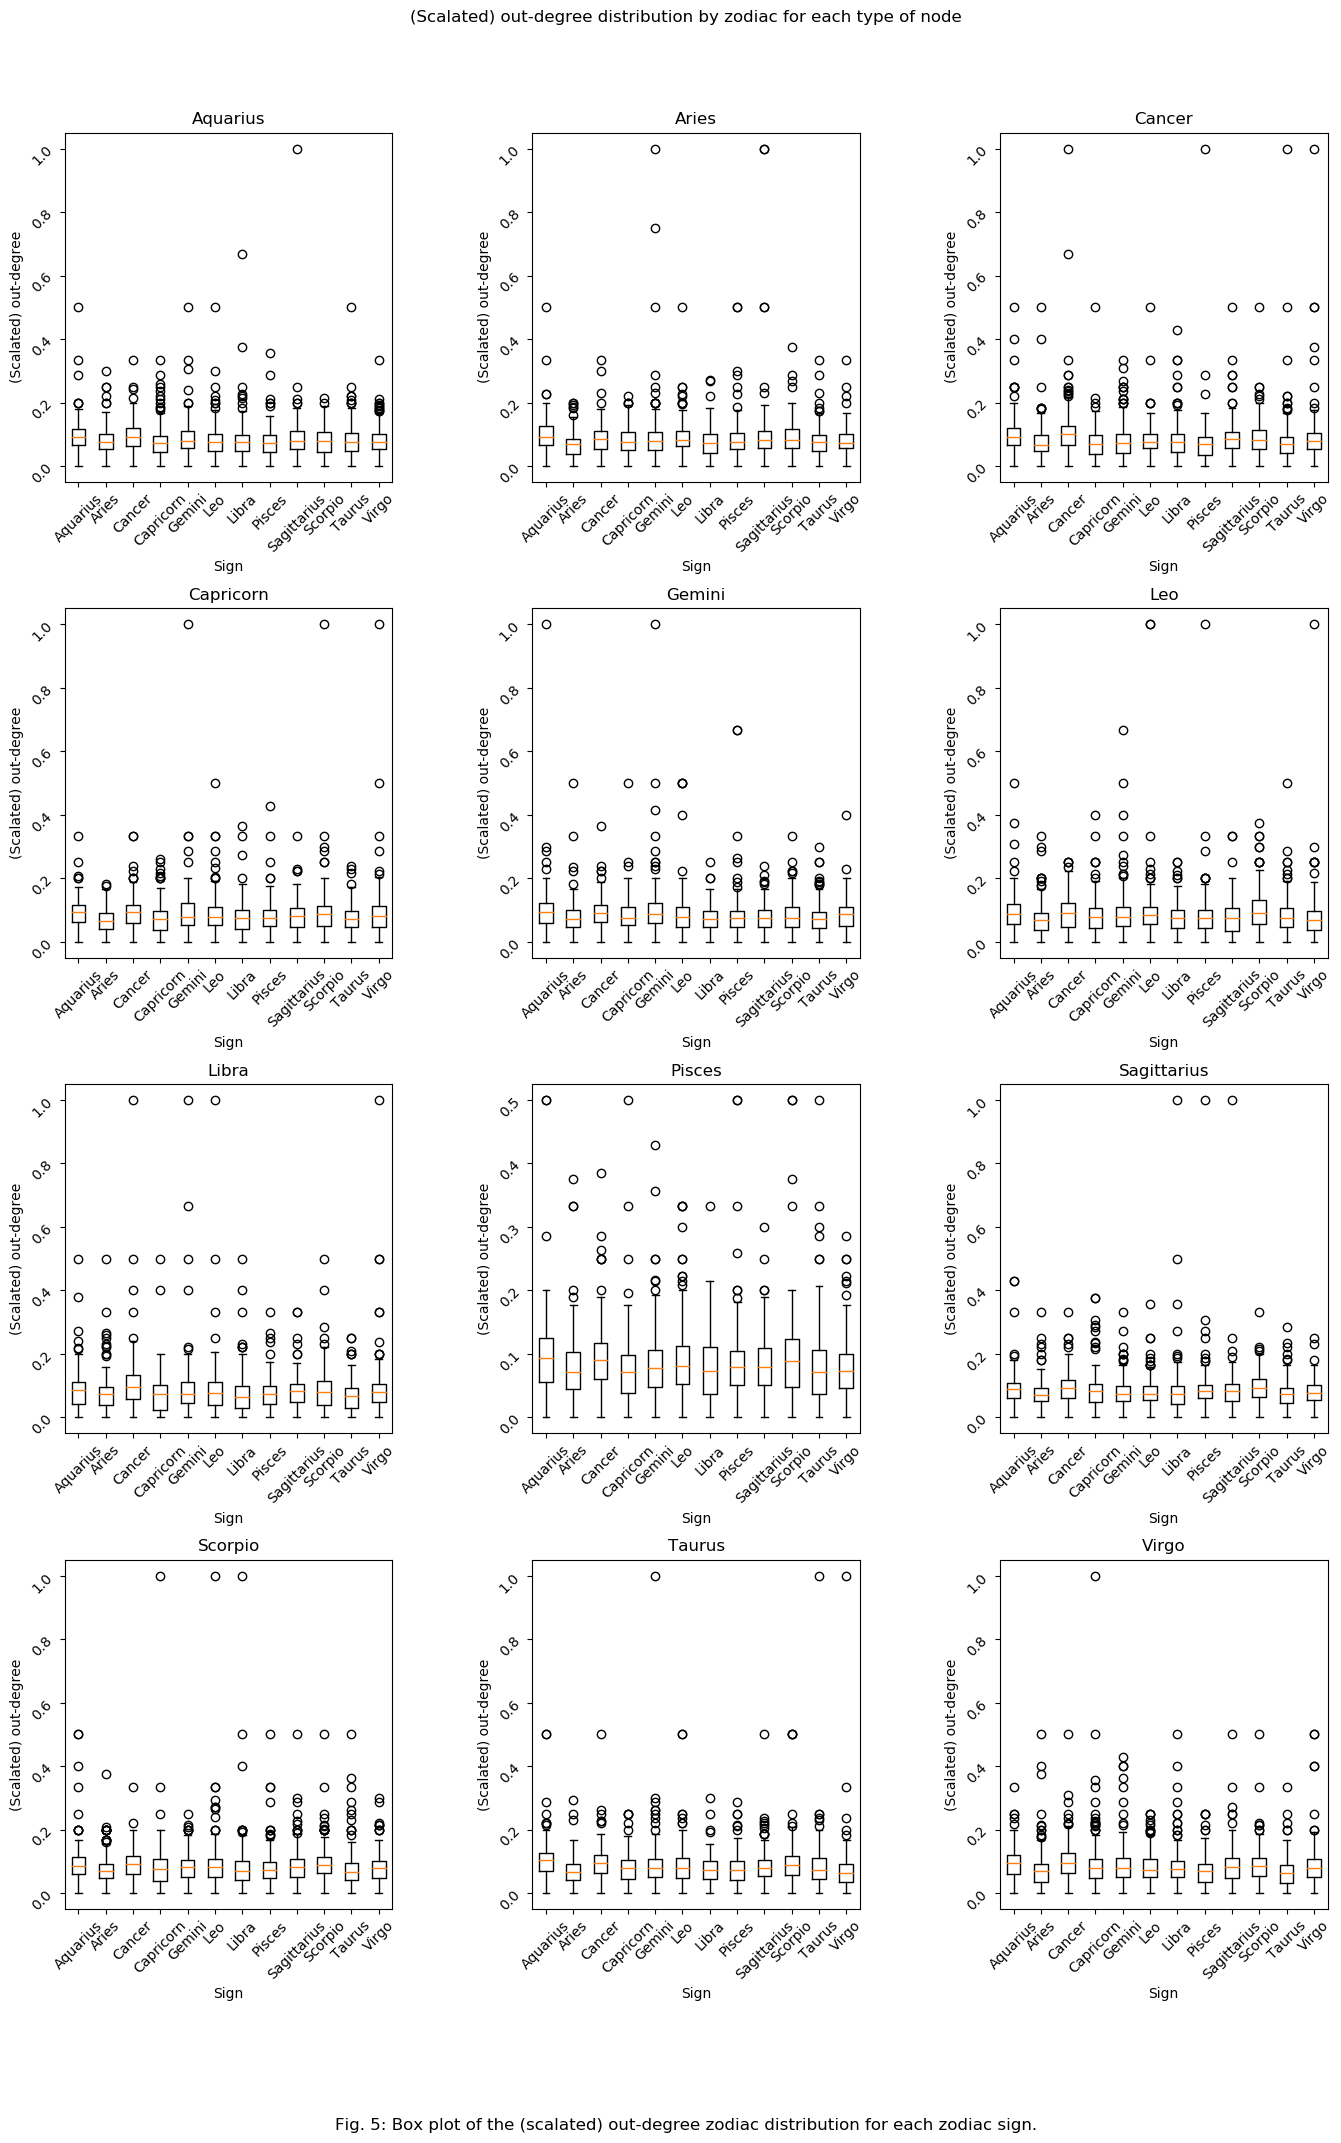

In [319]:
fig, subplots = plt.subplots(int(np.ceil(len(ZODIAC_SIGNS)/3)), 3, figsize=(15,20))
subplots = subplots.flatten()
fig.suptitle('(Scalated) out-degree distribution by zodiac for each type of node', y=1.01)
fig.tight_layout(pad=7.0)

for i, (key, value) in enumerate(out_sign_out_degree.items()):
    subplots[i].title.set_text(key)
    subplots[i].boxplot(list(value.values()), labels=ZODIAC_SIGNS) 
    subplots[i].tick_params(labelrotation=45)
    subplots[i].set_ylabel('(Scalated) out-degree')
    subplots[i].set_xlabel('Sign')

plt.figtext(
        0.5, 
        -0.05, 
        'Fig. 5: Box plot of the (scalated) out-degree zodiac distribution for each zodiac sign.', 
        wrap=True, 
        horizontalalignment='center', 
        fontsize=12
) 

plt.show()

Each graph represents the distribution of outgoing edges for a given zodiac sign. Based on the box plots, all the signs follow each other in a quite similar way. We can see a few outliers where the scalated out-degree is 1. This means that there are about 35 accounts that follow only only users from the same sign (this can be caused by users only following one account).

The average out-degree from the signs to each sign can be indicated by plotting the average (scalated) out-degree percentage for each sign:

In [ ]:
plt.figure(figsize = (16,12))

# Create legend
ax = plt.subplot(111)

for sign1, mean in mean_sign_out_degree.items():
    plt.plot(list(mean.keys()), list(mean.values()), 'o', markersize=10, color = color_legend_zodiac[sign1], label = sign1, markeredgewidth=0.8, markeredgecolor='k', alpha=0.8)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Average (scalated) out-degree of each sign to each sign")
plt.xlabel("Sign")
plt.ylabel("Average (scalated) out-degree percentage")            
plt.figtext(
    0.5, 
    -0.05, 
    'Fig. 6: Average (scalated) out-degree of zodiac signs with respect to each sign.', 
    wrap=True, 
    horizontalalignment='center', 
    fontsize=12
)

plt.show()

The average (scalated) out-degree percentage for each sign is mostly around 0.08-0.09. Since there are 12 signs, the average corresponds with an almost equal distribution of all the signs (1/12 = 0.083). However, some signs, like Aries and Taurus, have slightly lower values.

Despite the differences in values above being small, a compatibility or interest chart can be made to determine for each sign which signs have a high compatibility (highest average) and low compatibility (lowest average).

In [321]:
# Creation of a compatibility dataset
compatibility_df = pd.DataFrame(columns=["Sign", "High", "Low"])

for sign, mean in mean_sign_out_degree.items():
    compatibility_df = compatibility_df.append({
     "Sign": sign, "High":  max(mean, key=mean.get),"Low": min(mean, key=mean.get)}, ignore_index=True)
    
compatibility_df

Sign         High     Low
0      Aquarius     Aquarius  Pisces
1         Aries  Sagittarius   Aries
2        Cancer       Cancer  Pisces
3     Capricorn       Gemini   Aries
4        Gemini       Gemini   Libra
5           Leo      Scorpio   Aries
6         Libra       Cancer  Taurus
7        Pisces     Aquarius   Virgo
8   Sagittarius       Cancer  Taurus
9       Scorpio      Scorpio   Aries
10       Taurus     Aquarius   Aries
11        Virgo       Cancer  Taurus

In [322]:
C = nx.DiGraph()
C.add_nodes_from(compatibility_df.Sign)

# Set the attributes of the nodes
nx.set_node_attributes(C, dict(zip(compatibility_df.Sign, compatibility_df.High)), "high")
nx.set_node_attributes(C, dict(zip(compatibility_df.Sign, compatibility_df.Low)), "low")

high = nx.get_node_attributes(C,"high")
low = nx.get_node_attributes(C,"low")

# Create the links of the graph
high_edges = []
low_edges = []
for node in C.nodes():
    C.add_edge(node, high[node])
    C.add_edge(node, low[node])
    high_edges.append((node, high[node]))
    low_edges.append((node, low[node]))
    
# Display the network using forceAtlas
# Color the nodes based on the zodiac sign
node_color_zodiac = []
for node in C.nodes(data=True):
    node_color_zodiac.append(color_legend_zodiac[node[0]])

# Size the nodes based on their degree
#node_size = [v*0.5 for v in dict(C.degree).values()]

# Configure forceAtlas
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=False)

# Obtain the positions
positions = forceatlas2.forceatlas2_networkx_layout(C, pos=None, iterations=50)

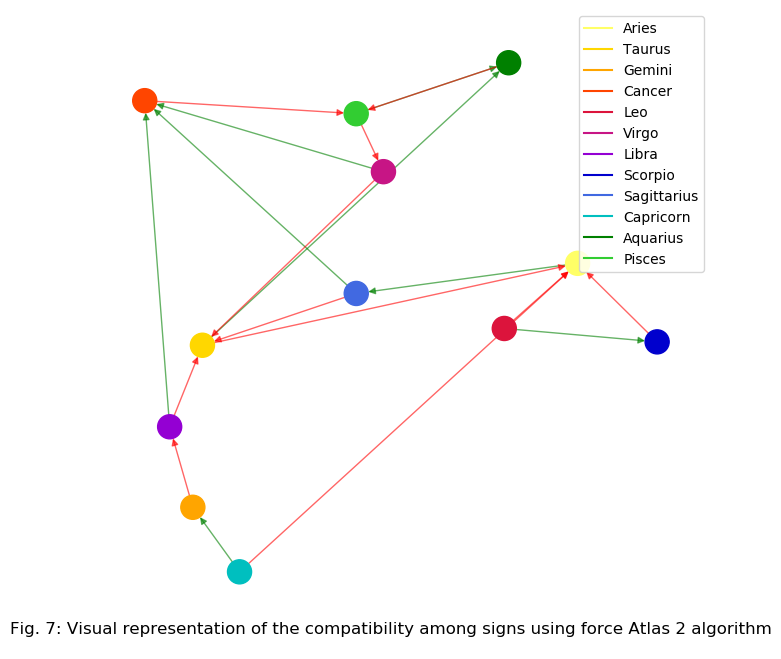

In [323]:
plt.figure(figsize = (8,8))

# Plot the graph
nx.draw_networkx_nodes(C, pos=positions, node_color=node_color_zodiac)

# Color the high compatibility in green
nx.draw_networkx_edges(C, pos=positions, alpha = 0.6, edgelist=high_edges, edge_color="green")

# Color the low compatibility in red
nx.draw_networkx_edges(C, pos=positions, alpha = 0.6, edgelist=low_edges, edge_color="red")


for label in color_legend_zodiac:
    plt.plot([0],[0], color=color_legend_zodiac[label],label=label)

plt.figtext(
    0.5, 
    0.1, 
    'Fig. 7: Visual representation of the compatibility among signs using force Atlas 2 algorithm', 
    wrap=True, 
    horizontalalignment='center', 
    fontsize=12
)
plt.legend()
plt.axis('off')
plt.show()

In this directed network, the nodes are all each of the 12 zodiac signs. Edges are directed and colored by high or low compatability. Based on the analysis, Cancer and Aquarius are the most popular signs, and Aries and Taurus the least popular. In regards to compatability, Aquarius and Pisces appear to have a very unbalanced relationship, where Pisces is the least favorite of Aquarius profiles, and Aquarius is the most preferred among Pisces.

However, based on the initial boxplots, these differences in out-degree are statistically insignificant, and differences in compatability will remain as speculation.

### 3.2 Communities analysis
So far, the analysis has focused on zodiac signs as a way to create different groups to analyze in the network. However, this is not a proper scientific analysis, as they can be interpreted as arbitrary partitions. To find the real communities in the network, the Louvain Algorithm is used. 

This method optimizes the modularity progressively, starting locally in all the nodes and then later in the communities that they begin to form. This means that at the beginning, all the nodes belong to their own community. After this, all these nodes are moved into their neigbor's community optimizing the modularity to the local maximum, thus small communities are formed. This process is repeated until the global modularity is optimized.

In [324]:
# Create communities, stored in partition dictionary
partition = community_louvain.best_partition(U)

# Count number of different community values
counts = Counter(partition.values())

print("There is a total of " + str(len(counts)) + " communities in our network")

There is a total of 10 communities in our network


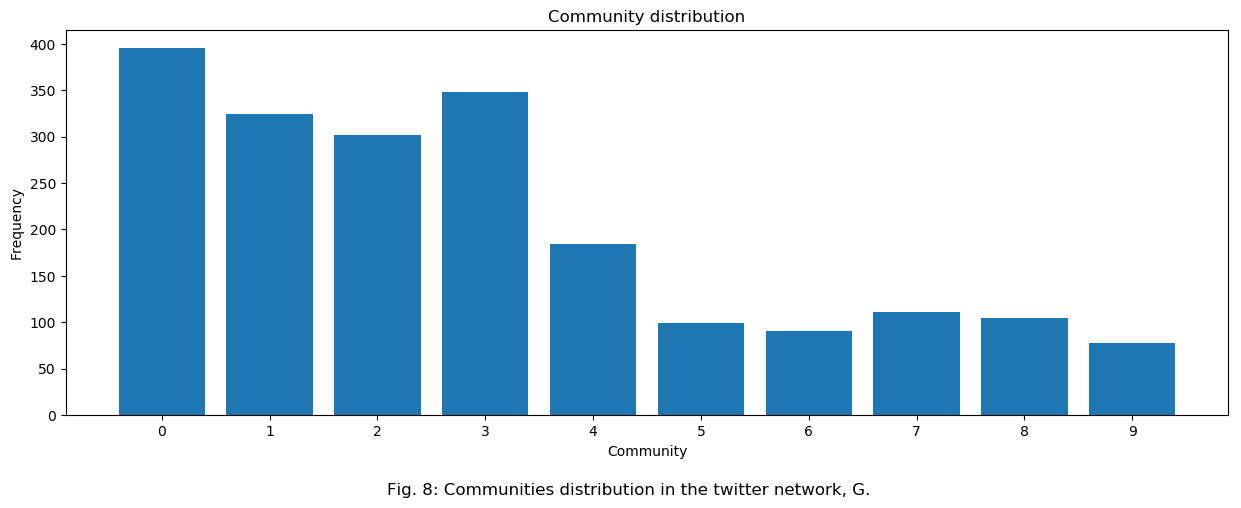

In [325]:
# Plot community distribution

# Store community values as list for histogram
communities = [value for key, value in partition.items()]
counts = Counter(communities)

# Create histrogram with a bin for each value in the community range (communities are integers)
plt.figure(figsize = (15,5))
plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()))


plt.title("Community distribution")
plt.ylabel("Frequency")
plt.xlabel("Community")
plt.figtext(
    0.5, 
    -0.05, 
    'Fig. 8: Communities distribution in the twitter network, G.', 
    wrap=True, 
    horizontalalignment='center', 
    fontsize=12
)
plt.show()

Community size varies highly, but the communities are all quite large.

As mentioned, it is a common beleif in astrology that some signs tend to be more compatible with others. If this were true, there may be a strong presence of compatible signs within communities. To check this, the zodiac distribution for each community is plotted.

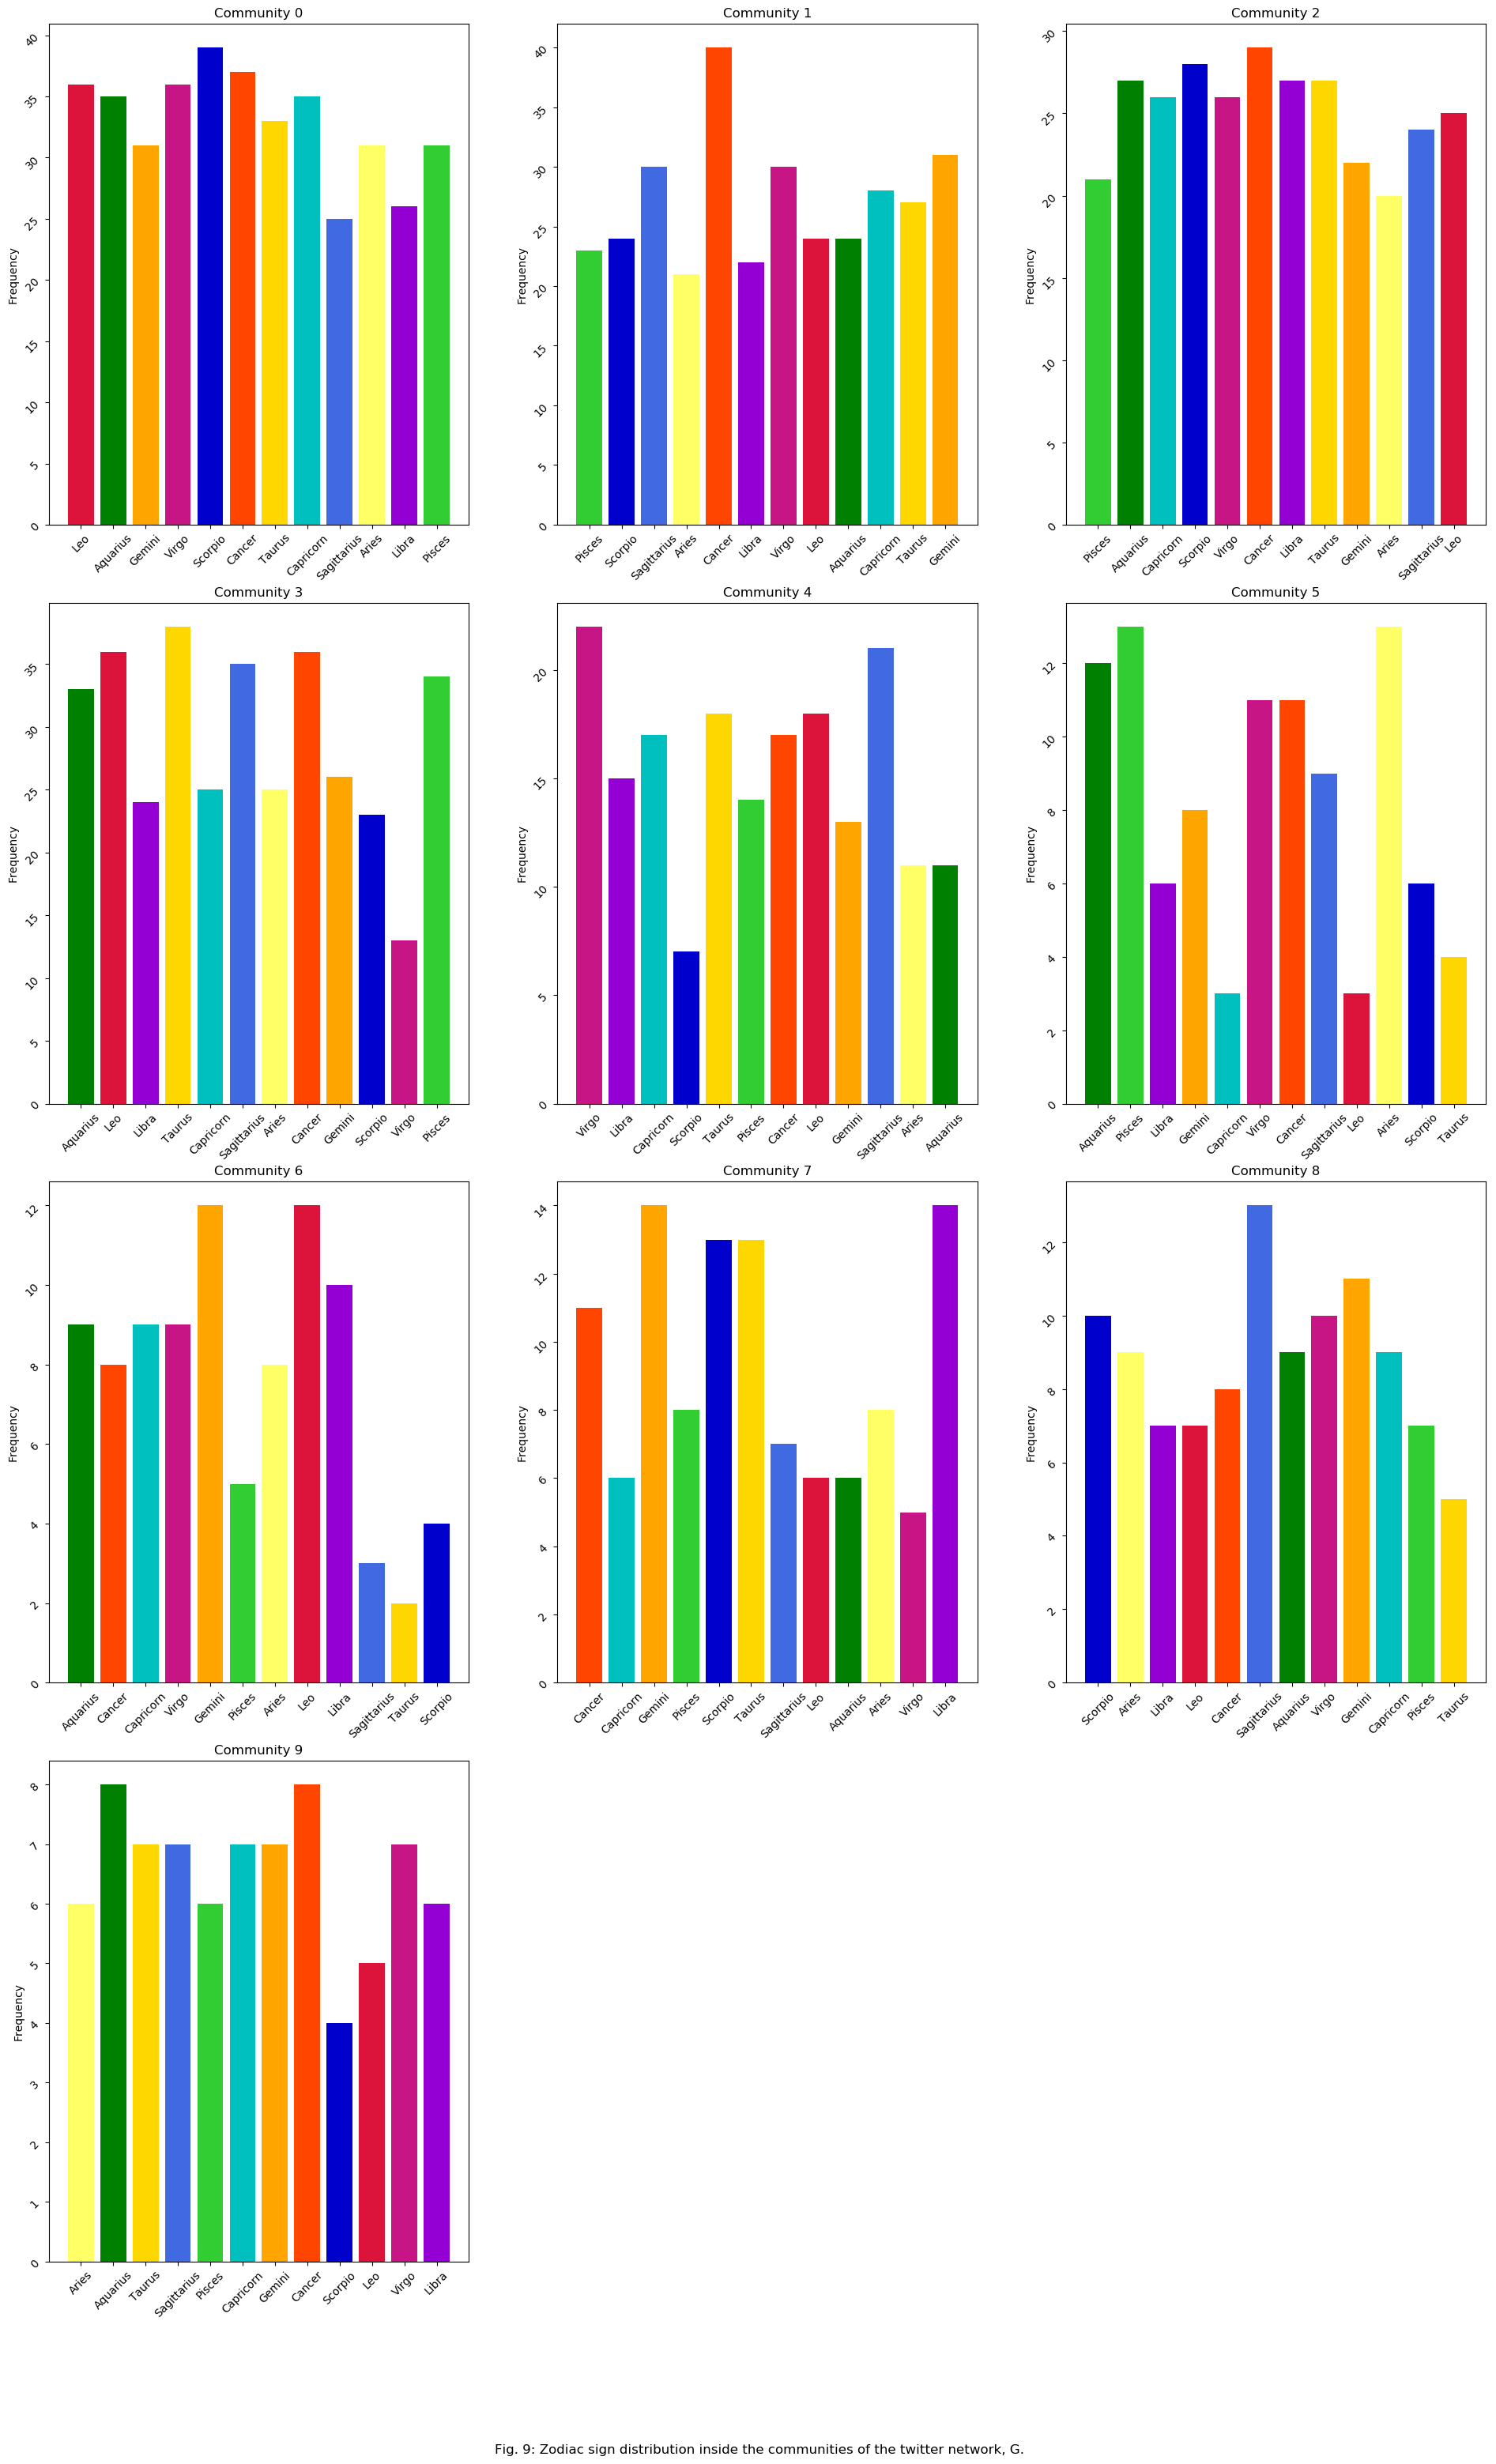

In [326]:
# Plot zodiac distribution inside each community

communities = partition.items()
counts = Counter([value for key, value in communities])
zodiacs = nx.get_node_attributes(G, 'zodiac')

fig, subplots = plt.subplots(int(np.ceil(len(counts)/3)), 3, figsize=(20,30))
#plt.xticks(rotation=45, ha='right')
#fig.suptitle('Sharing x per column, y per row')
fig.tight_layout(pad=5.0)

subplots = subplots.flatten()

# Hide empty axes
subplots[-2].set_visible(False)
subplots[-1].set_visible(False)

for comm in range(len(counts)):
    data = []
    same_comm = [k for k,v in communities if v == comm]
    for user in same_comm:
        data.append(zodiacs[user])
    data_counts = Counter(data)
    subplots[comm].title.set_text("Community "+ str(comm))
    subplots[comm].bar(list(data_counts.keys()), list(data_counts.values()), color=[color_legend_zodiac[zodiac] for zodiac in data_counts.keys()])        
    subplots[comm].tick_params(labelrotation=45)
    subplots[comm].set_ylabel('Frequency')

plt.figtext(
    0.5, 
    -0.05, 
    'Fig. 9: Zodiac sign distribution inside the communities of the twitter network, G.', 
    wrap=True, 
    horizontalalignment='center', 
    fontsize=12
)
plt.show()

The frequencies of zodiac signs in the communities are plotted above. However, most communities show similar distributions of signs, and though there are variations, no significant patterns emerge. As expected, communities show no obvious preference or compatibility among the signs. 

However, the signs can be grouped into 4 elements. Astrology claims that signs within the same element are compatible, and each element has an opposite, compatible element. If this were true, illustrating compatibility within elements should be easier, as there are less combinations to compare. To check this, the element distribution inside each community is plotted.

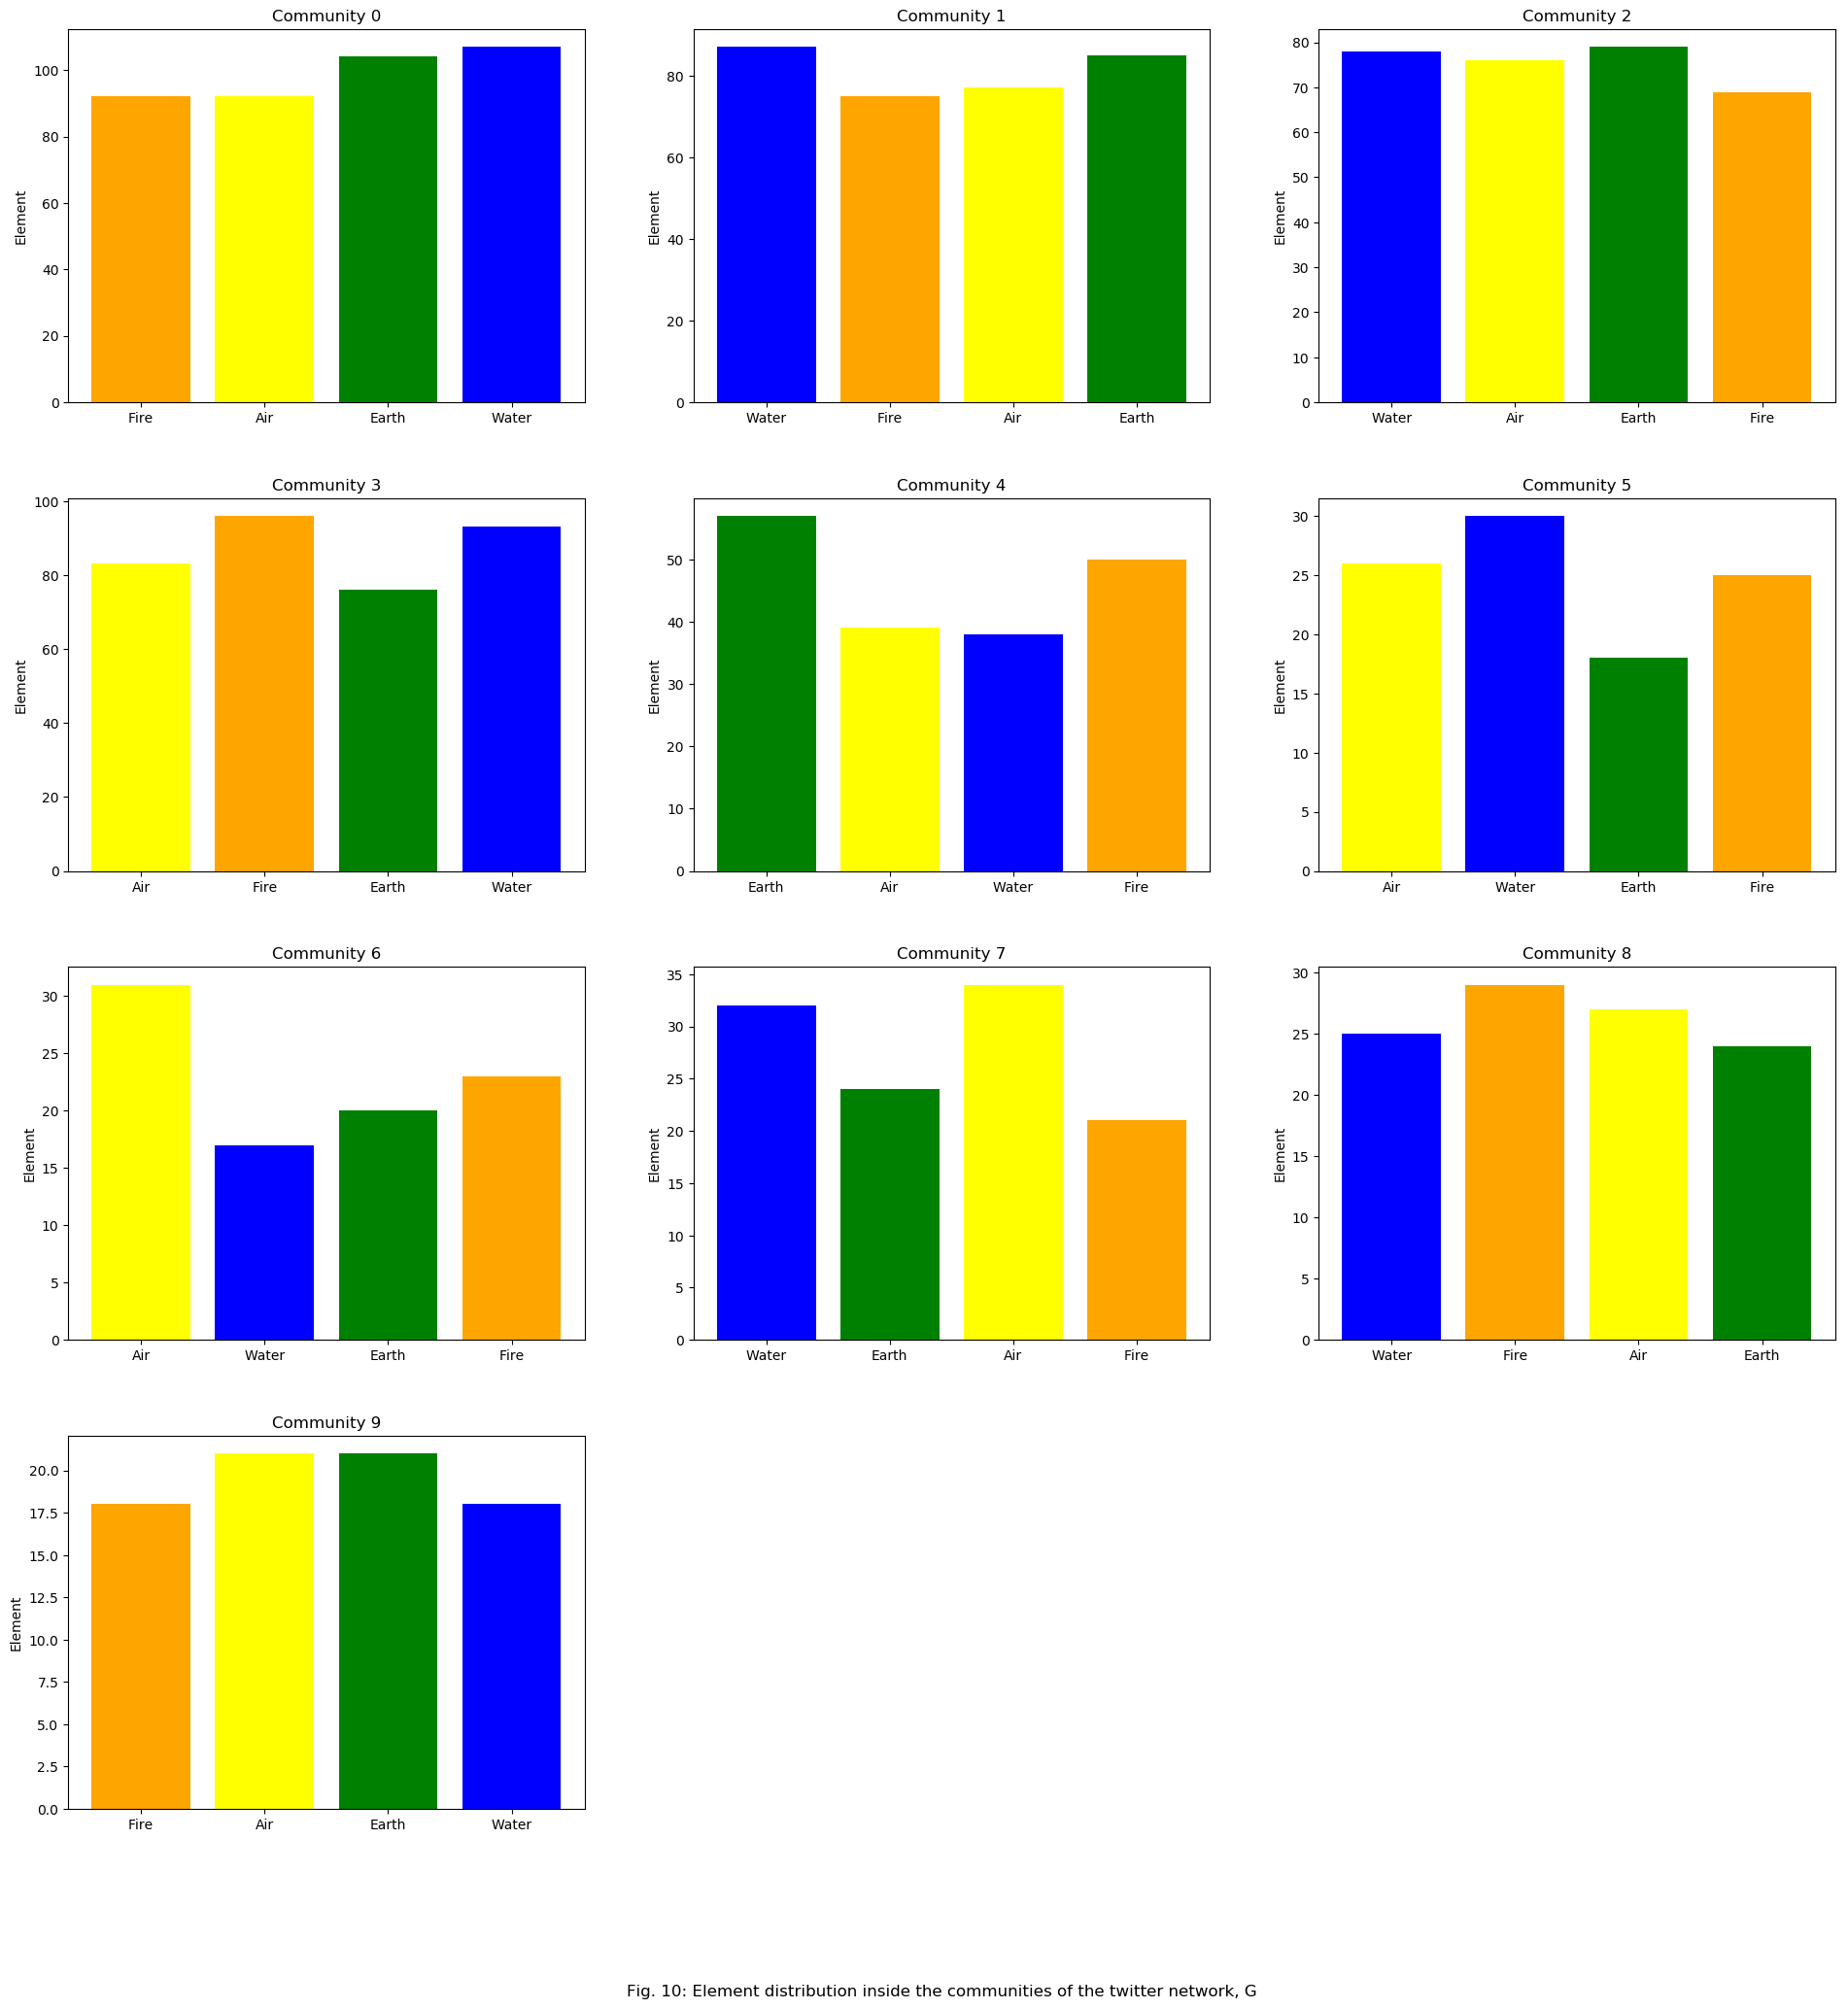

In [327]:
# Plot zodiac distribution inside each community

communities = partition.items()
counts = Counter([value for key, value in communities])
elements = nx.get_node_attributes(G, 'element')

fig, subplots = plt.subplots(int(np.ceil(len(counts)/3)), 3, figsize=(20,20))
#plt.xticks(rotation=45, ha='right')
#fig.suptitle('Sharing x per column, y per row')
fig.tight_layout(pad=5.0)

subplots = subplots.flatten()

# Hide empty axes
subplots[-2].set_visible(False)
subplots[-1].set_visible(False)

for comm in range(len(counts)):
    data = []
    same_comm = [k for k,v in communities if v == comm]
    for user in same_comm:
        data.append(elements[user])
    data_counts = Counter(data)
    subplots[comm].title.set_text("Community "+ str(comm))
    subplots[comm].bar(list(data_counts.keys()), list(data_counts.values()), color=[color_legend_element[element] for element in data_counts.keys()])       
    subplots[comm].set_ylabel('Frequency')
    subplots[comm].set_ylabel('Element')

plt.figtext(
    0.5, 
    -0.05, 
    'Fig. 10: Element distribution inside the communities of the twitter network, G', 
    wrap=True, 
    horizontalalignment='center', 
    fontsize=12
)
plt.show()

As before, the distribution of elements within each community has been plotted.  In the plots, all communities show an even presence of each sign. Again, as expected, there is no evidence of varying compatibility among users of different astrological elements. 

Astrology also claims that there are some signs that tend to be more outgoing or extroverted. To determine whether this applies to the network, the 3 most popular users of each zodiac sign are extracted.

In [328]:
# A function to print a list nicely
def print_popularity(popularity_list):
    for user, popularity in popularity_list:  
        print("   {} ({})".format(user, popularity))
        
# A function to add the followers of the most popular 
def add_popularity(popularity_list):
    total = 0
    for user, popularity in popularity_list:  
        total += popularity
    return total

In [330]:
# Show the 3 most popular accounts in each zodiac
zodiacs = nx.get_node_attributes(G, 'zodiac').items()
sign_popularity = {}

for sign in ZODIAC_SIGNS:
    user_popularity = {}
    same_sign = [k for k,v in zodiacs if v == sign]
    
    for user in same_sign:
        user_popularity[user] =  G.in_degree(user)
        
    # Sort the popularity by descending order    
    sorted_user_popularity_zodiac = sorted(user_popularity.items(), key=lambda x: x[1], reverse=True)
    
    # Nicely print
    print(sign, ": ")
    print_popularity(sorted_user_popularity_zodiac[:3])
    
    sign_popularity[sign] = add_popularity(sorted_user_popularity_zodiac[:3])

Aquarius : 
   @theellenshow (637)
   @oprah (463)
   @jtimberlake (414)
Aries : 
   @ladygaga (448)
   @pharrell (289)
   @emmawatson (269)
Cancer : 
   @elonmusk (356)
   @tomhanks (339)
   @arianagrande (329)
Capricorn : 
   @ryanseacrest (344)
   @kingjames (330)
   @jimcarrey (298)
Gemini : 
   @kanyewest (357)
   @realdonaldtrump (328)
   @andersoncooper (258)
Leo : 
   @barackobama (752)
   @jlo (313)
   @ddlovato (279)
Libra : 
   @kimkardashian (313)
   @snoopdogg (308)
   @kamalaharris (307)
Pisces : 
   @rihanna (500)
   @justinbieber (444)
   @iamwill (228)
Sagittarius : 
   @taylorswift13 (386)
   @chrissyteigen (307)
   @sarahksilverman (299)
Scorpio : 
   @katyperry (412)
   @jimmykimmel (349)
   @drake (347)
Taurus : 
   @adele (274)
   @therock (262)
   @stephenathome (244)
Virgo : 
   @jimmyfallon (551)
   @pink (262)
   @paulocoelho (228)


All of the the most popular users in the network are distributed through the different signs. Still, there is a sign that has e the top three most popular, which we could consider as the most outgoing sign, as well as sign with the least known popular users.

In [331]:
print("The sign with the top 3 most popular users is", max(sign_popularity, key=sign_popularity.get))
print("The sign with the top 3 less popular users is", min(sign_popularity, key=sign_popularity.get))

The sign with the top 3 most popular users is Aquarius
The sign with the top 3 less popular users is Taurus


### 3.3 Content Analysis

According to astrology, eaach sign has a unique temperament. The tweets of the users in the network are analyzed to determine differences in words used.

To later determine differences in sentiment between users, a sentiment score for different words is used. For this study, the sentiment dataset used is one developed specifically to analyse tweets, as tweets include slang terms like 'lol'.
The dataset is called AFINN (source: Finn Årup Nielsen, "A new ANEW: evaluation of a word list for sentiment analysis in microblogs", Proceedings of the ESWC2011 Workshop on 'Making Sense of Microposts': Big things come in small packages. Volume 718 in CEUR Workshop Proceedings: 93-98. 2011 May. Matthew Rowe, Milan Stankovic, Aba-Sah Dadzie, Mariann Hardey (editors))

In [332]:
# load AFINN words
afinn_words = dict(map(lambda kv: (kv[0],int(kv[1])), 
                     [ line.split('\t') for line in open("./AFINN/AFINN-111.txt") ]))

The Twitter API has a method to query tweets (see ./Datagathering.ipynb to know how the tweets are gathered). The tweets are given in a Tweet object. This object contains different information about the tweet, like the link to the tweet, the text, the user, etc. If the tweet is long, the text field contains only part of the tweet and leaves unfinished words. To clean the tweets, the link to the tweet and the unfinished words are removed.

As the users from the network come from all parts of the world, their tweets are in many different languages. In order to analyze the content of these tweets, only words/tokens that are english or in the AFINN dataset are processed. This is achieved by only including words contained in the nltk words dictionary that contains english words, and the AFINN words, in total a 239213 english word dictionary. Apart from that, stopwords from the most spoken languages are removed, as some of these words also appear in the english dictionary created.

Althought analyzing the hashtags could have been quite interesting, the variety of languages in the dataset made it too challenging to extract meaningful content for the analysis from the hashtags, so these are removed.

In [ ]:
# Tokenization of the tweets

# Define stopwords from the most common languages
stopwords = sw.words('english') + sw.words('spanish') + sw.words('portuguese') + sw.words('french')

# Define the english words to use
englishwords = words.words() + list(afinn_words.keys())

# Initialize tokenizer
tokenizer = WhitespaceTokenizer()

# Dictionary of tokens for each user
tokens_dict = {}

for node in df.Handle:
    # Compile tweets
    tweets = df.loc[df['Handle'] == node].Tweets.values
    tweet_words = ' '.join(tweets)
    
    # Remove links
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    raw = pattern.sub('', tweet_words)

    # Remove punctuation
    raw = raw.replace('\\n',' ')
    raw = raw.replace('\\',' ')
    raw = raw.replace('=',' ')
    raw = raw.replace('/',' ')
    raw = raw.replace('(',' ')
    raw = raw.replace(')',' ')
    raw = raw.replace(',',' ')
    raw = raw.replace('.',' ')
    
    # Make all words lowercase
    raw = raw.lower()
    
    # tokenize tweet string get list of words
    tweet_words = tokenizer.tokenize(raw)
    
    # Remove hashtags
    tweet_words = [word for word in tweet_words if word[0] != '#']
        
    # Remove stopwords and non-english words
    tweet_words = [word for word in tweet_words if (word not in stopwords and word in englishwords)]

    tokens_dict[node] = tweet_words   

Once all the words are compiled, they are stored as node atributes as they will be used in the analysis.

In [335]:
nx.set_node_attributes(G, tokens_dict, "tokens")  

To determine which words are used more by different zodiac signs, Term Frequency - Inverse Document Frequency (TF-IDF)-values are calculated. The results can be displayed as word clouds.

The Term Frequency is an evaluation of occurrences of a word in a document. There are several ways of calculating this, but for the purpose of this study, TF will simply be calculated as the raw number of occurences: $tf(t,d) = f_{t,d}$

In [ ]:
# Get the term frequency for our communities zodiac signs

words = set()

# Create documents with the words of each character in each sign
documents = {}

# Compile term frequencies for each sign
tf = {}

tokens = nx.get_node_attributes(G, 'tokens')
zodiacs = nx.get_node_attributes(G, 'zodiac').items()

for zodiac in ZODIAC_SIGNS:
    nodes = [x for x, y in zodiacs if y==zodiac]
    
    document = []
    for user in nodes:
        document = document + tokens[user]
    words.update(document)
    documents[zodiac] = document
    
    # Get the term frequency for the document
    tf[zodiac] = FreqDist(document) 


The Inverse Document Frequency is an evaluation of how common a word across all documents in the analysis. Again, this can be calculated in different ways, and here it is calculated by the logarithm of the division of the number of documents by the number of the documents that the word appears in.

$idf(t,D) = \log(\frac{N}{n_t})$

In [ ]:
# Get the inverse document frequency for our zodiac signs

idf = {}

for word in words:
    nt = 0
    for _, doc in documents.items():
        if word in doc:
            nt +=1
    
    idf[word]= np.log(10/nt)

TF-IDF is calculated for each word in each documents and is the product of TF and IDF for a word:

In [ ]:
# Get the TF-IDF for our zodiac signs
tf_idf = {}
for zodiac in ZODIAC_SIGNS:
    tf_idf[zodiac] = {}

    for word, termf in tf[zodiac].items() :
        tf_idf[zodiac][word] = termf * idf[word]


In [334]:
# TODO REMOVE IF NOT NEEDED 
# LOAD USEFUL DATA
import pickle

with open('./datafiles/tf_idf.pickle', 'rb') as handle:
    tf_idf = pickle.load(handle)
with open('./datafiles/idf.pickle', 'rb') as handle:
    idf = pickle.load(handle)
with open('./datafiles/g.pickle', 'rb') as handle:
    G = pickle.load(handle)
with open('./datafiles/tokens_dict.pickle', 'rb') as handle:
    tokens_dict = pickle.load(handle)


Once the TF-IDF values are determined, word clouds can be plotted to display words uniquely popular for each sign. As the subject is zodiac signs, a masks have been created to shape the word clouds as figures tied to the zodiac constellations.

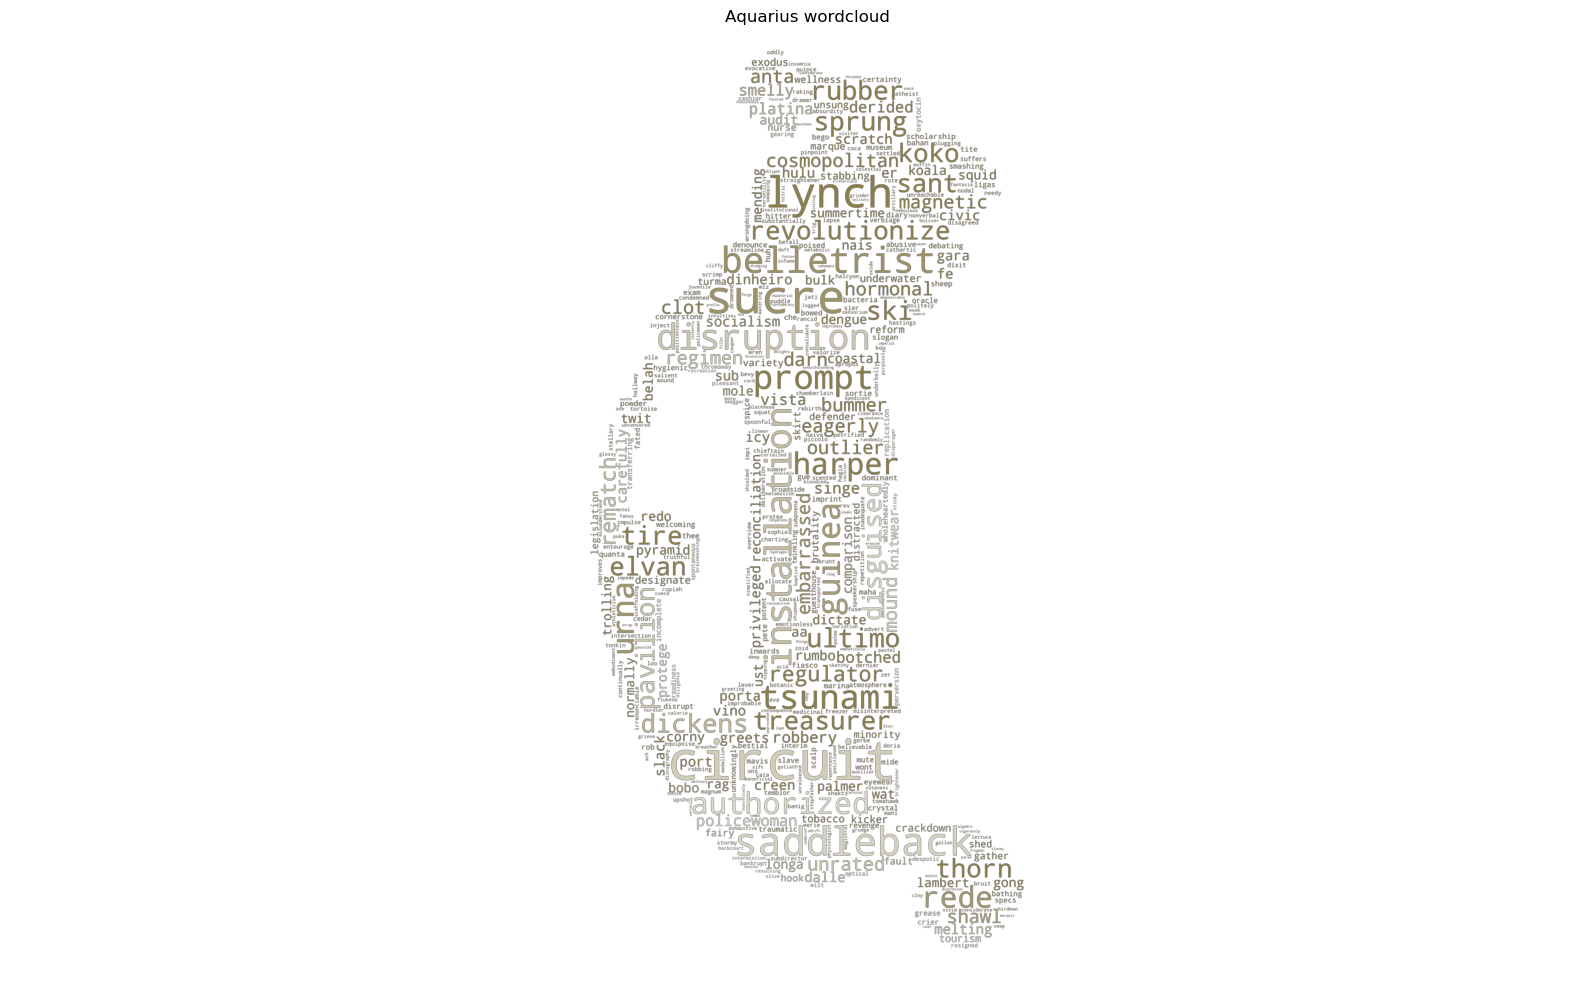

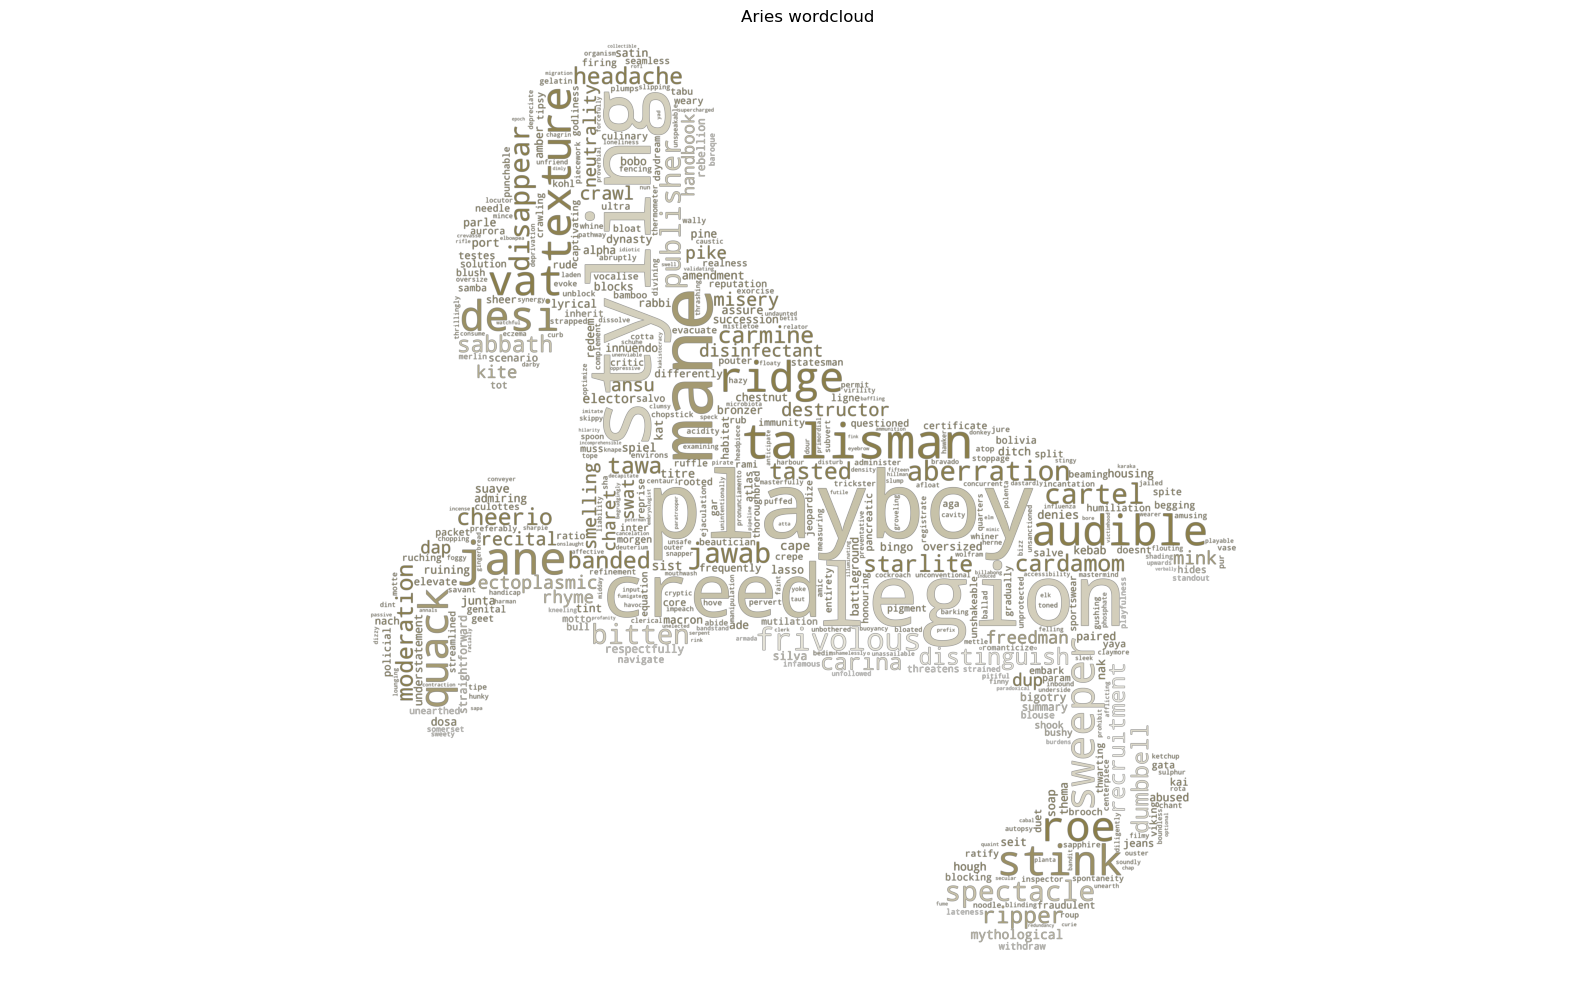

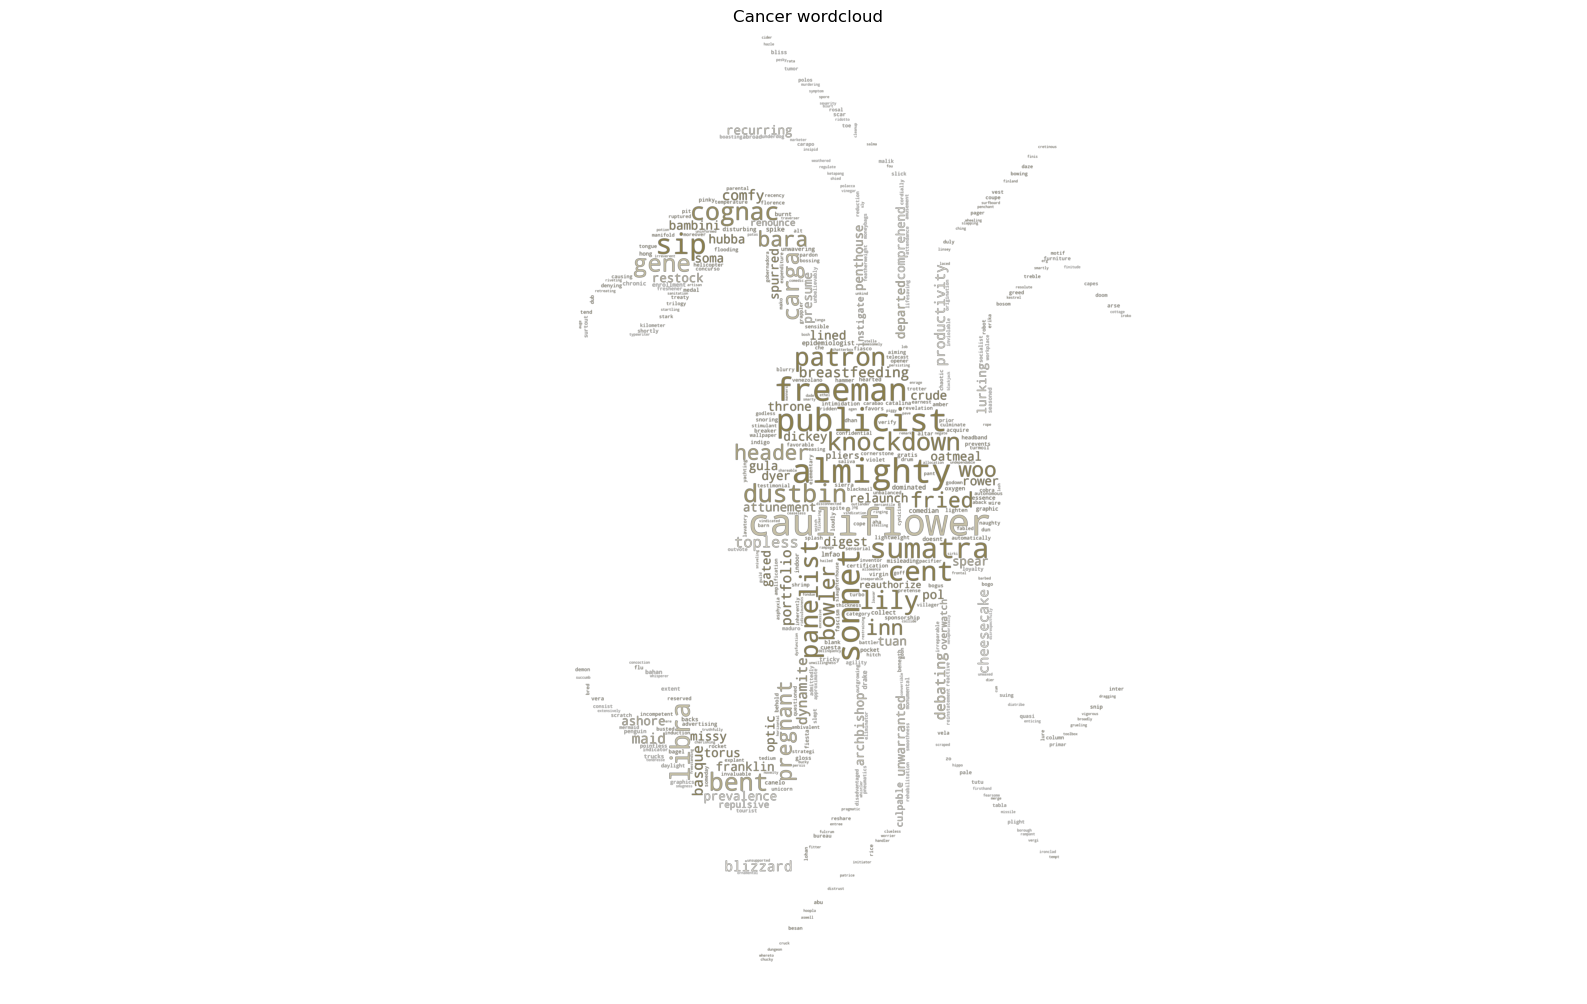

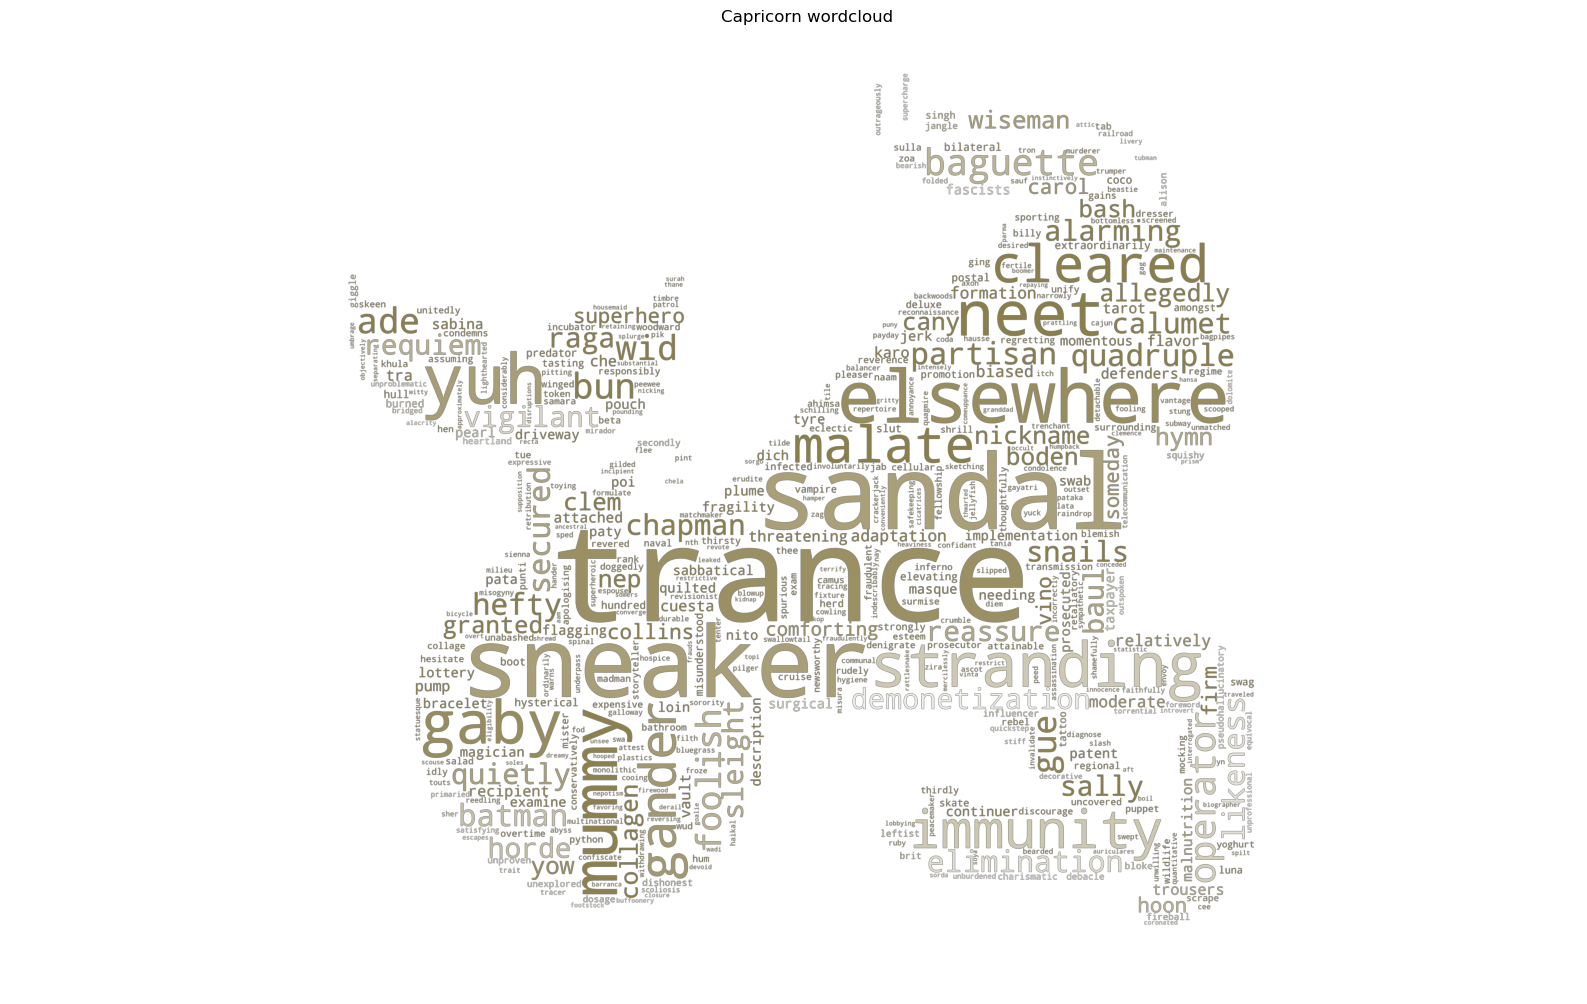

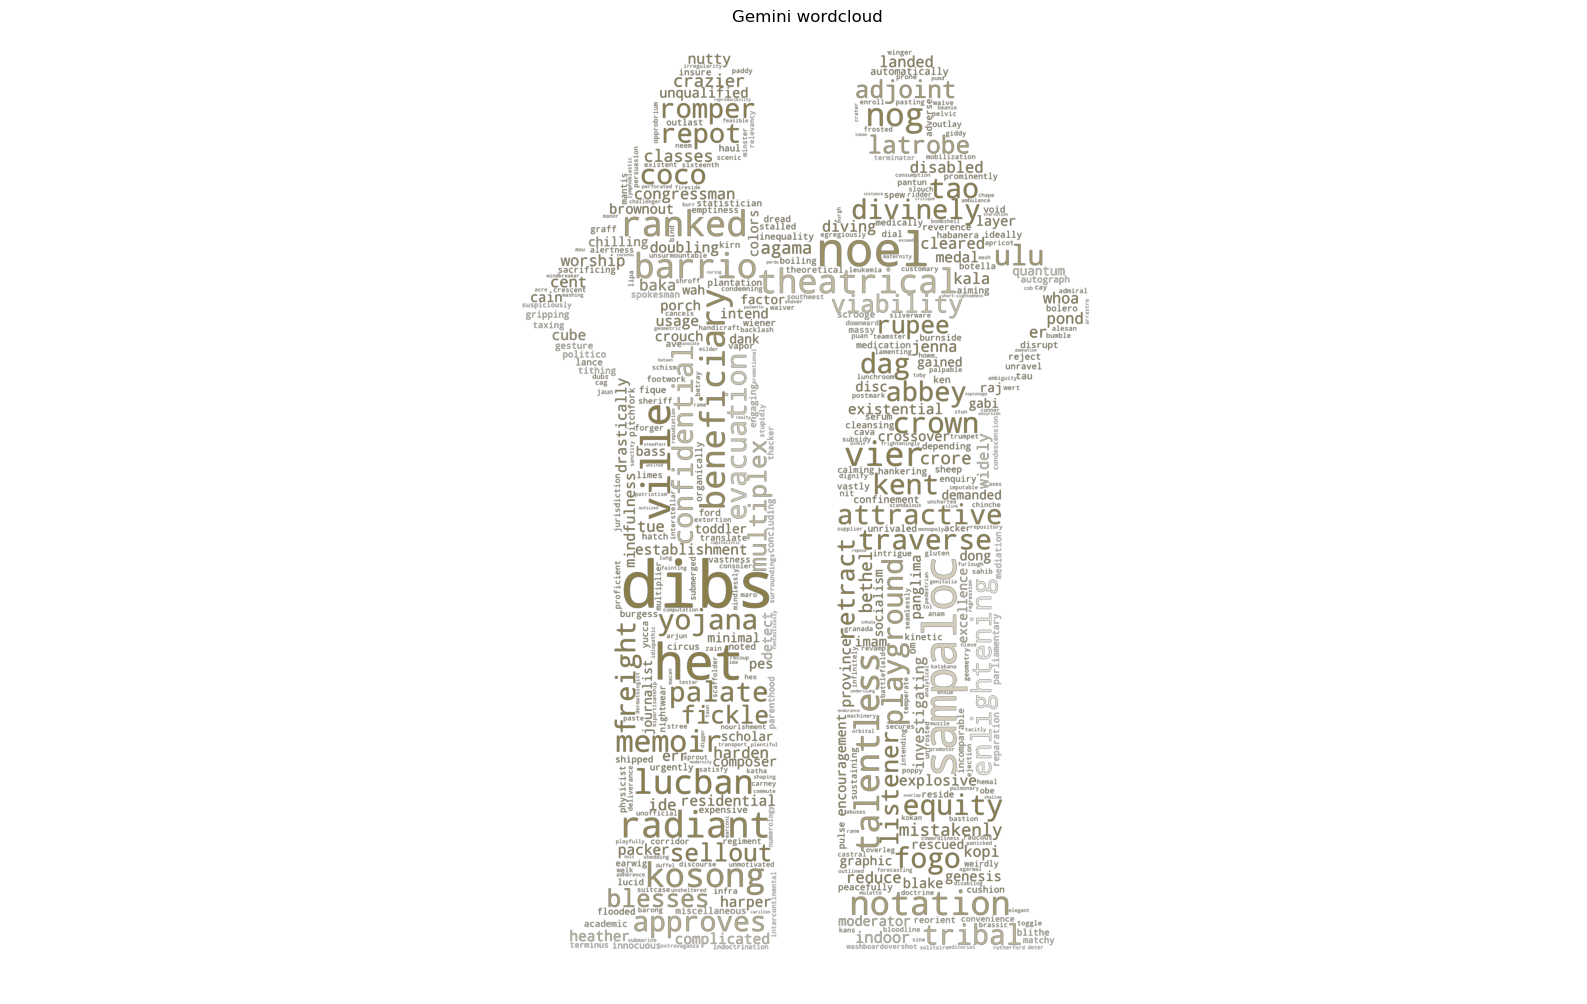

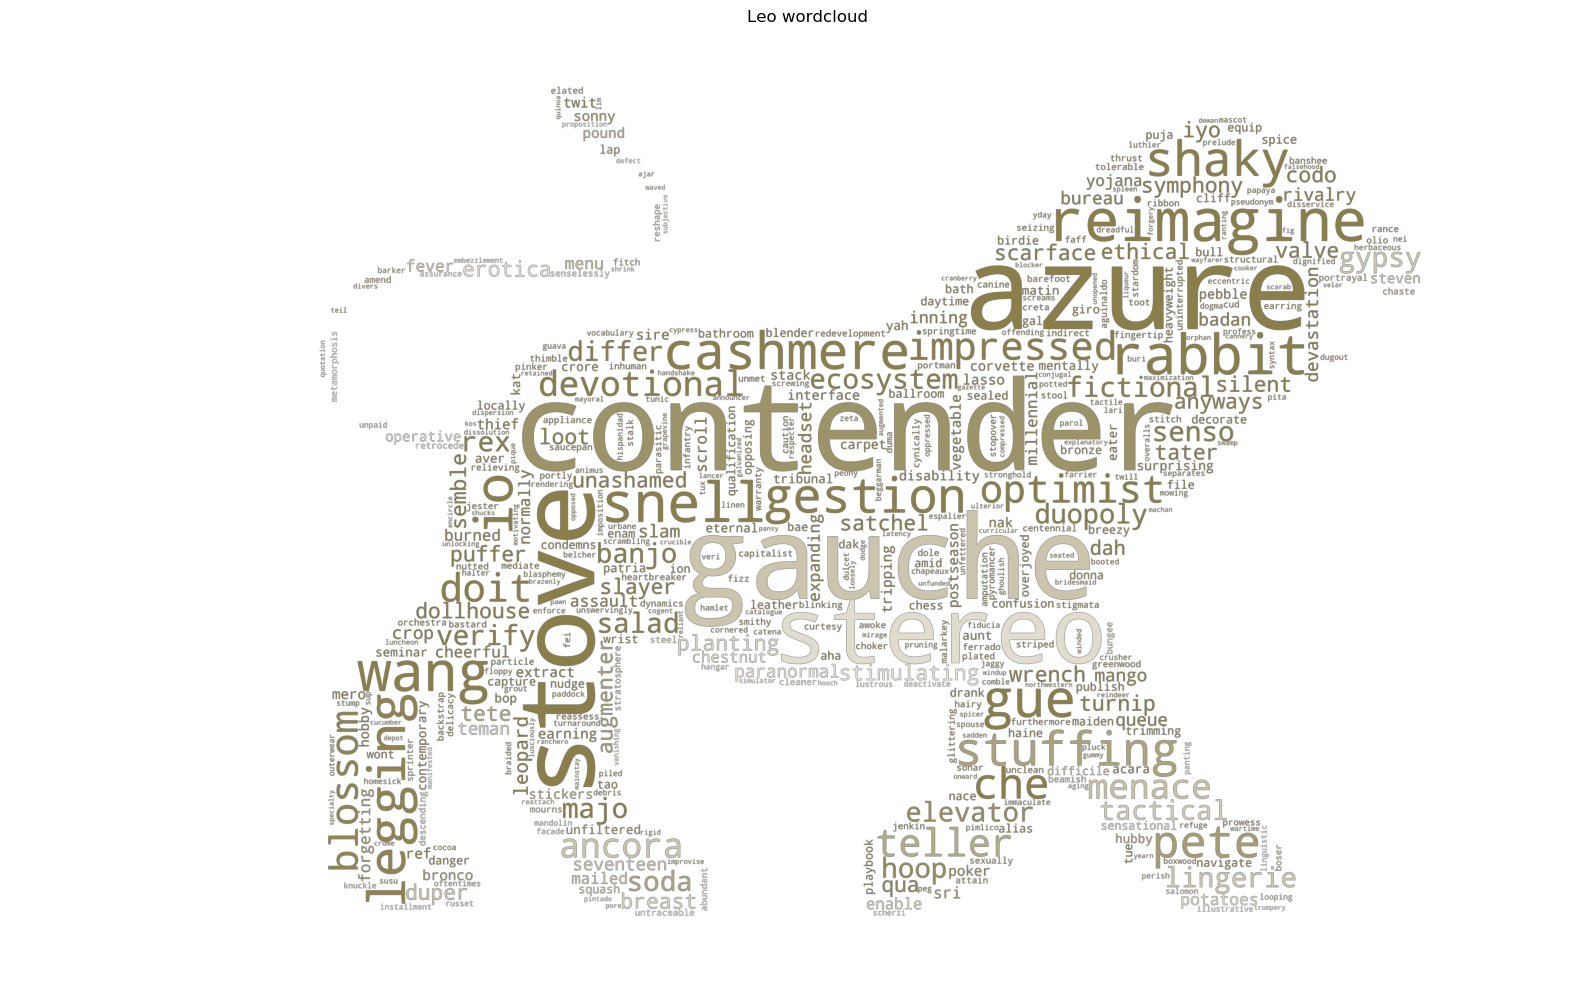

In [ ]:
# Create a wordcloud for each sign
for zodiac in ZODIAC_SIGNS:
    fdist = tf_idf[zodiac]
    mask_zodiac = np.array(Image.open("./images/" + zodiac + ".png"))

    # Create the wordclouds with a transparent background and the shape of the zodiac sign
    wc_zodiacs = WordCloud(width=8000, height=5000, mode="RGBA", background_color = None, max_words=500, mask=mask_zodiac, collocations = False).generate_from_frequencies(fdist)

    # Color the wordcloud with the colors of the zodiac sign
    image_colors = ImageColorGenerator(mask_zodiac)

    # Plot the wordcloud
    plt.figure(figsize = (16,10))
    plt.imshow(wc_zodiacs.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    
    # Save the wordcloud
    plt.tight_layout()
    plt.savefig("./images/" + zodiac + "_wordcloud.png", transparent=True)
    
    # Add caption to figure
    plt.title(zodiac + " wordcloud")
    plt.show()

Though meaning could be read into a few of the words in the resulting wordclouds, like 'statistics', 'playboy', and 'unverified', the wordclouds seem generally random and mostly meaningless. The words in the wordclouds do not appear to be consistently related to any general differences. This could in part be due to the very broad content on twitter, and in that regard, the dataset of tweets is not particularly large, and unusual topics will stand out.

### 3.4 Sentiment analysis

Even thought there were no meaningful results in the word clouds, the tweets of the users can be further analyzed by performing a sentiment analysis with the AFINN dataset.

In [ ]:
def sentiment(tokens):
    try:
        return np.mean([afinn_words[token] for token in tokens if token in afinn_words.keys()])
    except:
        return 0

The sentiment for each user is obtained:

In [ ]:
tokens = nx.get_node_attributes(G, 'tokens').items()

user_sentiment = {}
for user, token_list in tokens:
    user_sentiment[user] = sentiment(token_list)

If what astrology says were true, with the sentiment analysis we could be able to see that some signs tend to be more positive than others.

In [ ]:
# Sentiment analysis for zodiac signs
zodiacs = nx.get_node_attributes(G, 'zodiac').items()

zodiac_sentiments = {}
mean_sentiments = {}
std_sentiments = {}

for sign in ZODIAC_SIGNS:
    zodiac_sentiments[sign] = []
    same_sign = [k for k,v in zodiacs if v == sign]
    for user in same_sign:
        zodiac_sentiments[sign].append(user_sentiment[user])
    mean_sentiments[sign] = np.nanmean(zodiac_sentiments[sign])
    std_sentiments[sign] = np.nanstd(zodiac_sentiments[sign])


In [ ]:
# Average sentiment for each zodiac

plt.figure(figsize = (16,5))
plt.errorbar(mean_sentiments.keys(), mean_sentiments.values(), yerr=std_sentiments.values(), 
             fmt='o', linewidth=1, capsize=5, elinewidth=1, markersize = 10)
#print(markerfacecolor = [color_legend_zodiac[s] for s in list(mean_sentiments.keys())])
plt.title("Average sentiment for each zodiac sign")
plt.xlabel("Zodiac")
plt.ylabel("Sentiment")
plt.figtext(
    0.5, 
    -0.05, 
    'Fig. 11: Average sentiment for each zodiac sign in the twitter network. The sentiment was calculated using AFINN. Standard deviation indicated with error bars.', 
    wrap=True, 
    horizontalalignment='center', 
    fontsize=12
)

plt.show()

In the above plot, the sentiment for the signs is quite similar. There are minor differences with Leo, a Fire sign, being slightly more happy on average, and Libra, and Air sign, slightly less happy. The AFINN scale rates from -5 to 5, so Libra can still be considered a happy sign.

The same calculations can be performed to compare the average sentiment communities:

In [ ]:
# Sentiment analysis for communities

communities = partition.items()
counts = Counter([value for key, value in communities])

community_sentiments = {}
mean_sentiments = {}
std_sentiments = {}

for comm in range(len(counts)):
    community_sentiments[comm] = []
    same_comm = [k for k,v in communities if v == comm]
    for user in same_comm:   
        community_sentiments[comm].append(user_sentiment[user])
    mean_sentiments[comm] = np.nanmean(community_sentiments[comm])
    std_sentiments[comm] = np.nanstd(community_sentiments[comm])
    
    

In [ ]:
# Average sentiment for each community

plt.figure(figsize = (16,5))
plt.errorbar(mean_sentiments.keys(), mean_sentiments.values(), yerr=std_sentiments.values(), 
             fmt='o', linewidth=1, capsize=5, elinewidth=1, markersize = 10)
#print(markerfacecolor = [color_legend_zodiac[s] for s in list(mean_sentiments.keys())])
plt.title("Average sentiment for each community")
plt.xlabel("Community")
plt.ylabel("Sentiment")
plt.figtext(
    0.5, 
    -0.05, 
    'Fig. 12: Average sentiment for each community in the twitter network. The sentiment was calculated using AFINN. Standard deviation indicated with error bars.', 
    wrap=True, 
    horizontalalignment='center', 
    fontsize=12
)

plt.show()

This time, there is a clear difference in the average sentiment of our communities. Community 3 can clearly be identified as the happiest community. As the AFINN scale rates from -5 to 5, no  can be considered sad or negative, as all of them have an average sentiment of at least ~1. This clear variation in sentiment further cements the lack of significant difference between the previously plotted sentiments of the zodiac signs.

The sentiment frequency distribution can also be analyzed for the different zodiac signs:

In [ ]:
# Sentiment frequency distribution for each sign

fig, subplots = plt.subplots(int(np.ceil(len(ZODIAC_SIGNS)/3)), 3, figsize=(15,15))
subplots = subplots.flatten()
fig.suptitle('Sentiment frequency distribution for each zodiac sign', y=1.01)
fig.tight_layout(pad=5.0)

for sign_index in range(len(ZODIAC_SIGNS)):

    bins = np.arange(int(np.nanmin(zodiac_sentiments[ZODIAC_SIGNS[sign_index]])), int(np.nanmax(zodiac_sentiments[ZODIAC_SIGNS[sign_index]])+1))-0.5
    subplots[sign_index].title.set_text(ZODIAC_SIGNS[sign_index])
    subplots[sign_index].hist(zodiac_sentiments[ZODIAC_SIGNS[sign_index]], bins=bins, alpha=0.5, histtype='bar', ec='black', rwidth=0.9)         
    subplots[sign_index].set_ylabel('Frequency')
    subplots[sign_index].set_xlabel('Sentiment')

plt.figtext(
        0.5, 
        -0.05, 
        'Fig. 13: Sentiment frequency distribution for each sign in the twitter network. The sentiment was calculated using AFINN.',  
        wrap=True, 
        horizontalalignment='center', 
        fontsize=12
)   
plt.show()

All the signs use mostly positive words in their tweets. From the plots it can be interpreted that there are no significant differences in the sentiment of the different zodiac signs tweet. 

It should be noted, however, that most of the users in the network are public figures, and often use their twitter account to promote their own content and therefore that they use mostly positive words.

## 4. Discussion

Throughout this notebook we explored the cosmic aspects of Twitter. Although astrology has been debunked on numerous occasions, some people still believe in that zodiac signs shape your personality. It is in the human being's nature to feel the need for explaining their past, present and future through their own expectations. Zodiac signs are just one of those explanations.

One of the main difficulties encountered during the project was the process of gathering all the data. Not only because all the information came from different resources, but also mainly because of the Twitter API. As thousands of queries were made, a rate limit was encountered numerous times. This made the entire data gathering cumbersome. A way to improve this can be improved is not having to rely on the Twitter API. This can be achieved either by using another social media platform, or finding an existing dataset. 

The dataset also turned out to be relatively limited for the TF-IDF-analysis, as the wordclouds seemed to mainly include topics. If the dataset of tweets was larger, more insignificant topics may have been filtered out.

Besides this, while working with a different type of dataset as previously used in the assignment, a hard time was encountered while trying to find the best way to approach the analysis. Specifically the analysis of degree distribution proved to be a challenge, and a more in-depth statistical analysis can be performed on this data to determine whether there may be smaller variations that were not detected in this project.

As the goal of the project was to search for differences that likely don't exist. As there were no significant differences determined in the analyses, it can be concluded that this dataset does not indicate that zodiac signs have an effect on personality or compatability.


## 5. Contributions

The table bellow will provide a better overview on who took care of each part.

| Sub Chapter      | Contributor |
| ----------- | ----------- |
| Introduction to the dataset |   Irina     |
| Reason for choosing this dataset |   Irina     |
| The goal for the end user's experience |   Lucia    |
| Pakages used |   Irina    |
| Dataset |   Lucia, Simone    |
| Dataset compilation |  Lucia    |
| Dataset cleaning |  Simone  |
| Creation of the network |  Lucia      |
| Visualization of the network |  Simone     |
| Degree  |  Lucia     |
| Interaction analysis |  Lucia     |
| Communities analysis | Lucia, Simone   |
| Content analysis |  Lucia   |
| Sentiment analysis |   Simone   |
| Discussion |  All   |
| Website layout  | Irina   |
| Website content | Irina   |